## EXPLORATORY DATA ANALYSIS ON RISK ANALYTICS DATA

### Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Cleaning

#### About the data

In [4]:
application_df = pd.read_csv('/content/drive/MyDrive/Credit EDA Case Study/application_data.csv')
prev_df = pd.read_csv('/content/drive/MyDrive/Credit EDA Case Study/previous_application.csv')

In [5]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Merge the datasets
df = application_df.merge(prev_df, how = 'left', on = 'SK_ID_CURR')

In [8]:
df.shape

(1430155, 158)

In [9]:
#Eliminate the ID number columns from both data sets
df.drop("SK_ID_CURR", axis = 1, inplace = True)
df.drop("SK_ID_PREV", axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 156 entries, TARGET to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(84), int64(40), object(32)
memory usage: 1.7+ GB


####Check For Null Values

In [11]:
#Convert all 'XNA' and 'XAP' values into nan's
df = df.replace('XNA', np.nan)
df = df.replace('XAP', np.nan)

In [12]:
#Percentage of null values in all columns of application data
df.isna().mean() * 100

TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.003846
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
                               ...    
DAYS_FIRST_DUE               40.384434
DAYS_LAST_DUE_1ST_VERSION    40.384434
DAYS_LAST_DUE                40.384434
DAYS_TERMINATION             40.384434
NFLAG_INSURED_ON_APPROVAL    40.384434
Length: 156, dtype: float64

In [13]:
#Drop columns that have missing values of more that 20%
application_missing = pd.DataFrame(df.isna().mean() * 100)
print(f'Number of columns dropped: {application_missing[application_missing[0] > 20].shape[0]}')
df = df.drop(application_missing[application_missing[0] > 20].index, axis = 1)

Number of columns dropped: 72


In [14]:
#Drop rows that have missing values less than 1%
cols_to_drop_rows = application_missing[(application_missing[0] > 0) & (application_missing[0] < 1)].index
df = df.dropna(subset = cols_to_drop_rows)

In [15]:
#Impute remaining missing values using median (for numeric columns) or mode (for categorical columns)
for col in df.columns:
  if df[col].dtype == 'object':
    df.loc[:, col].fillna(df[col].mode()[0], inplace = True)
  else:
    df.loc[:, col].fillna(df[col].median(), inplace = True)

In [16]:
df.isna().sum()

TARGET                  0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
                       ..
DAYS_DECISION           0
NAME_CLIENT_TYPE        0
CHANNEL_TYPE            0
SELLERPLACE_AREA        0
PRODUCT_COMBINATION     0
Length: 84, dtype: int64

In [17]:
df.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,PRODUCT_COMBINATION
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,SATURDAY,9.0,Y,1.0,Approved,-606.0,New,Stone,500.0,POS other with interest
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,FRIDAY,12.0,Y,1.0,Approved,-746.0,Repeater,Credit and cash offices,-1.0,Cash X-Sell: low
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,SUNDAY,17.0,Y,1.0,Approved,-828.0,Refreshed,Stone,1400.0,POS industry with interest
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,SATURDAY,15.0,Y,1.0,Approved,-2341.0,Refreshed,Country-wide,200.0,POS household with interest
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,FRIDAY,5.0,Y,1.0,Approved,-815.0,New,Regional / Local,30.0,POS mobile without interest


#### Identifying good features

Certain features like 'FLAG_DOCUMENT' and 'EXT_SOURCE' are ambiguous and make no sense. Hence it is better to drop them for the sake of this analysis

In [18]:
drop_cols = [x for x in df.columns if ('FLAG_DOCUMENT' in x) or ('EXT_SOURCE' in x)]
drop_cols

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [19]:
df.drop(drop_cols, axis = 1, inplace = True)
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF

#### HANDLING OUTLIERS

In [20]:
#split columns into numeric and categorical variables
numeric = [x for x in df.columns if df[x].dtype != 'object']
categorical = [x for x in df.columns if df[x].dtype == 'object']

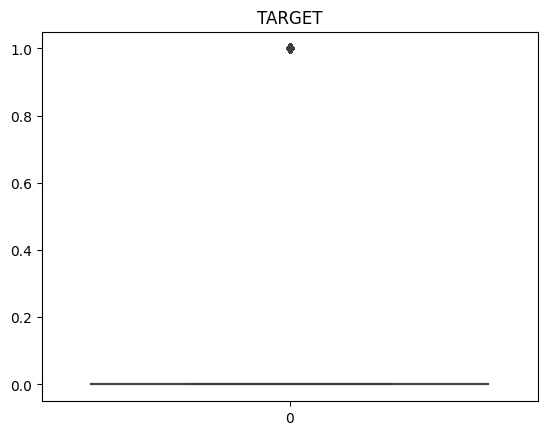

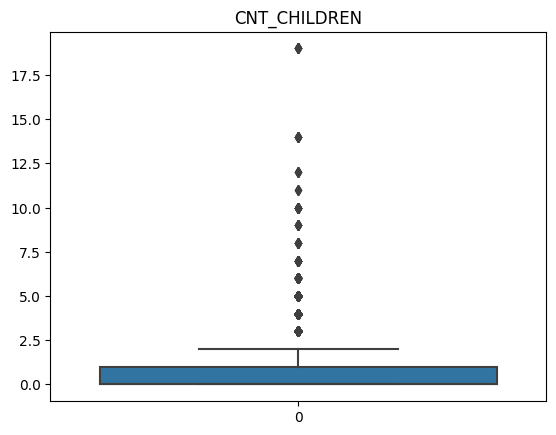

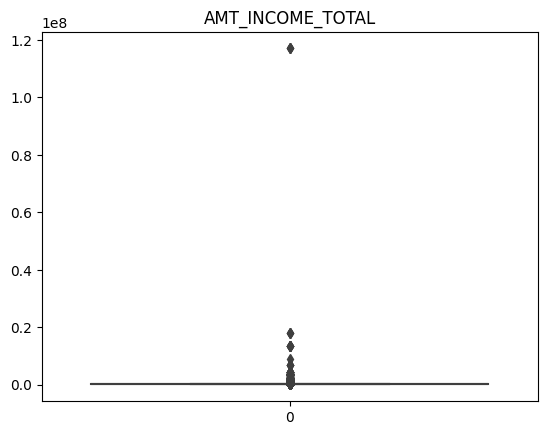

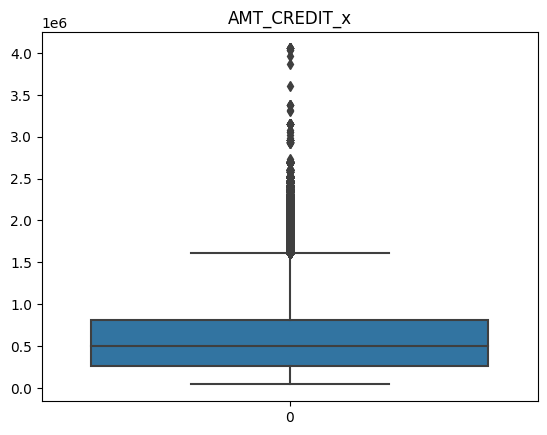

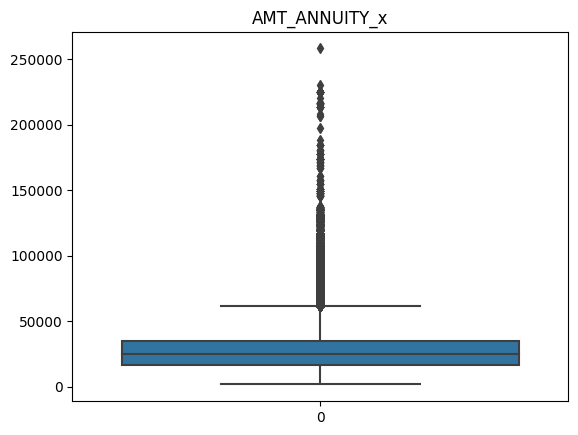

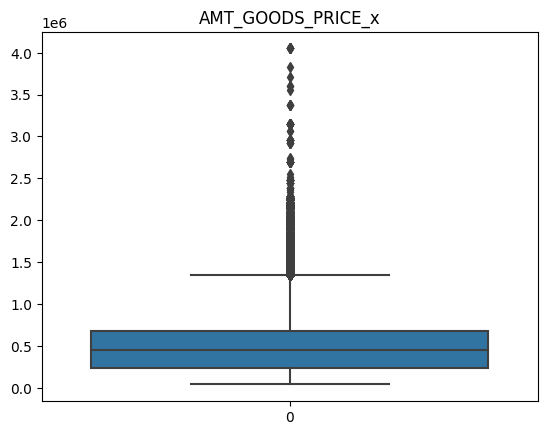

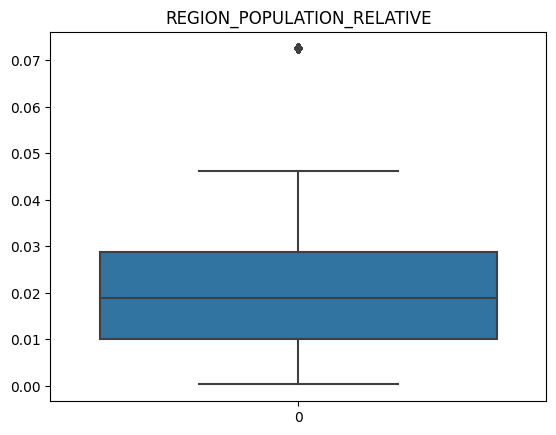

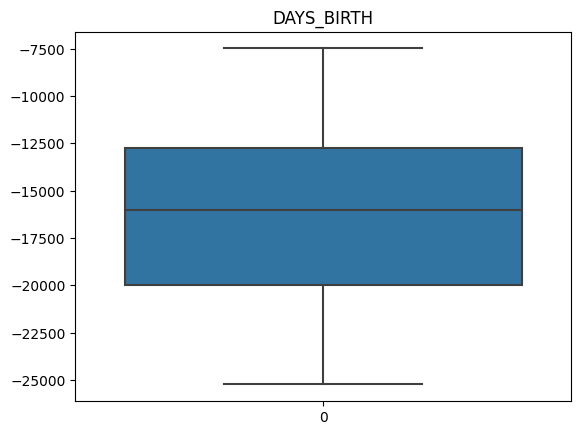

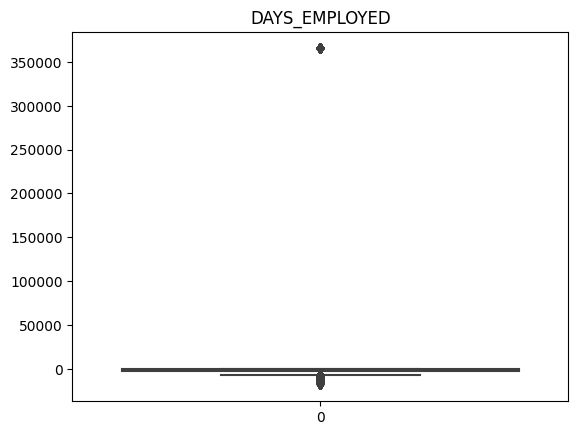

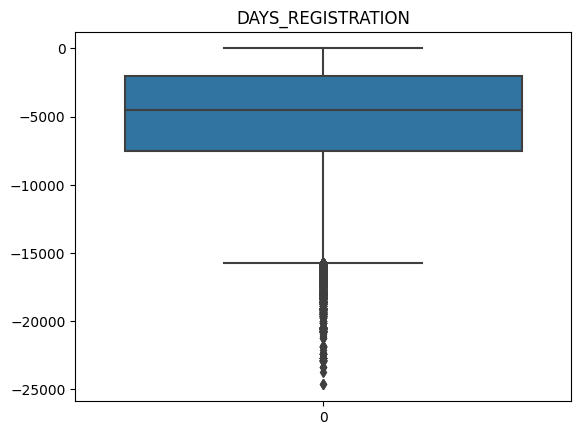

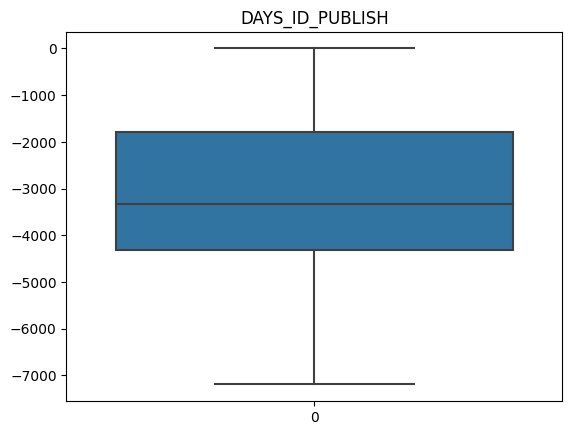

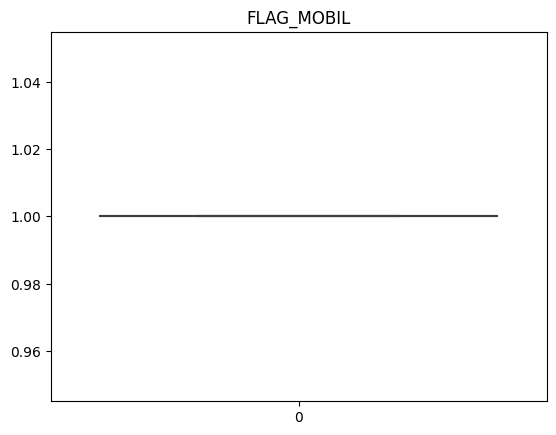

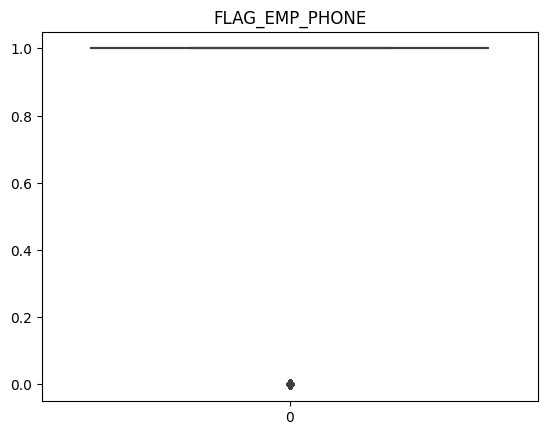

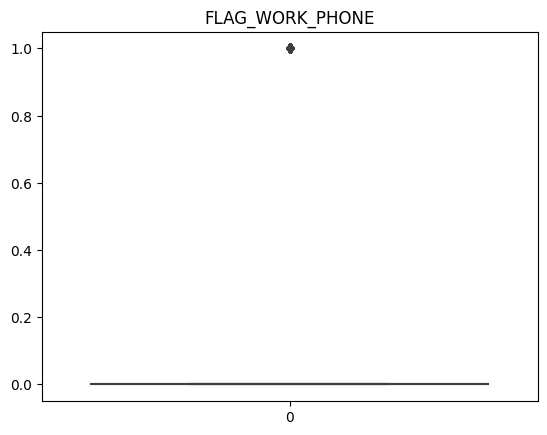

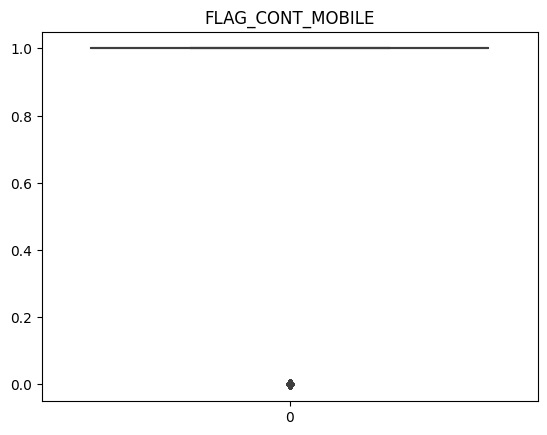

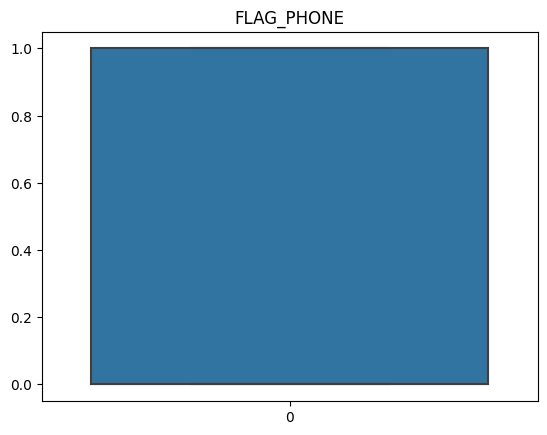

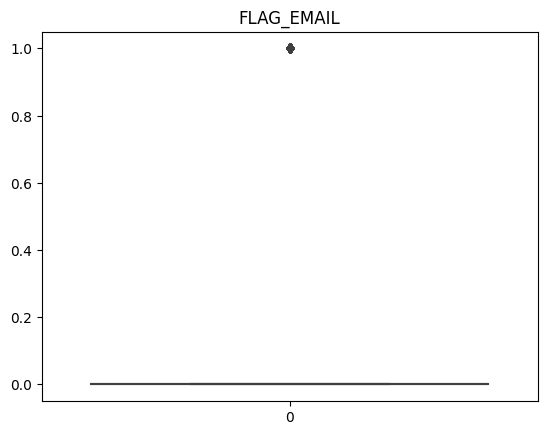

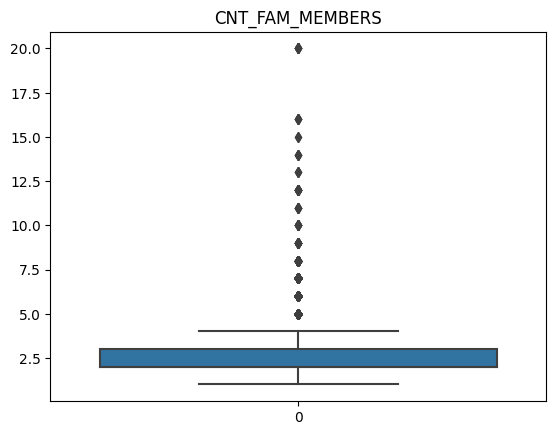

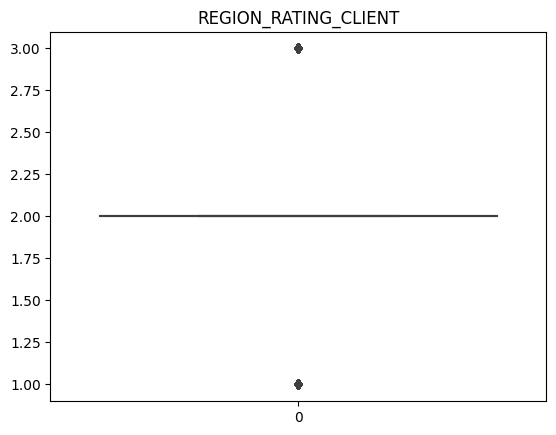

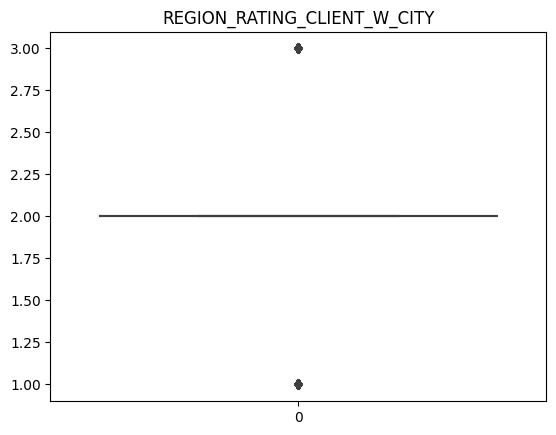

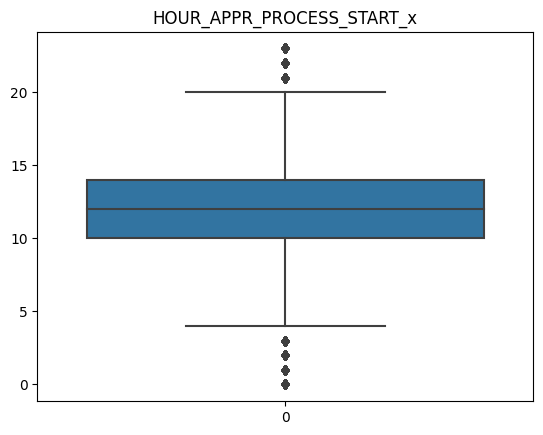

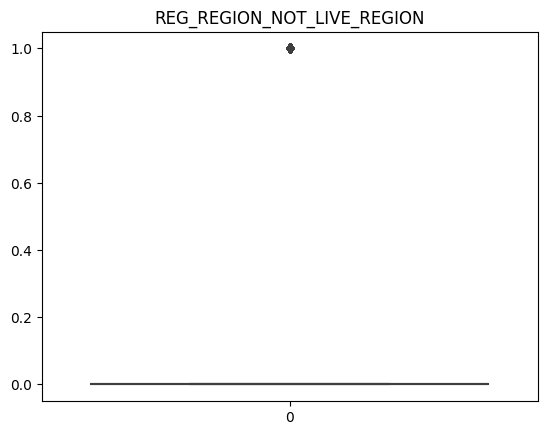

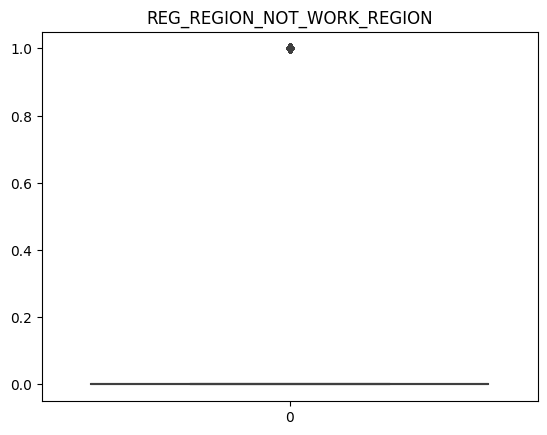

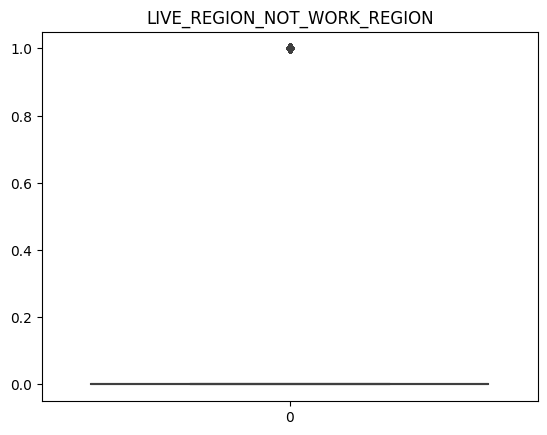

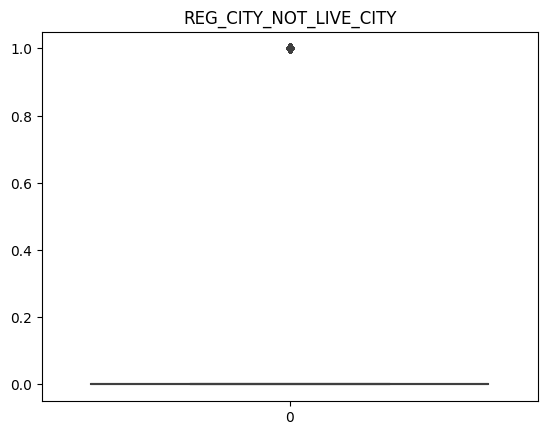

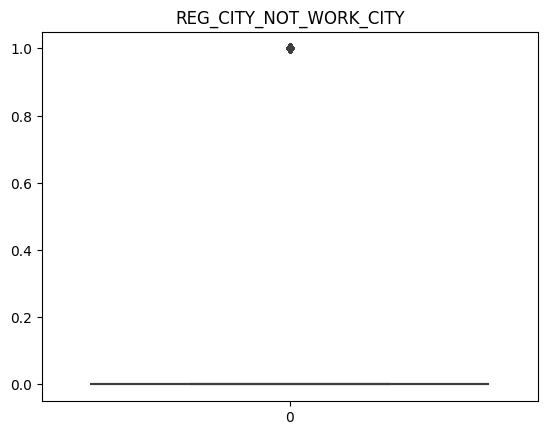

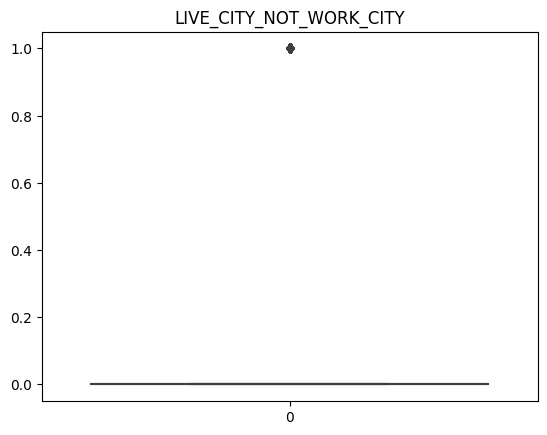

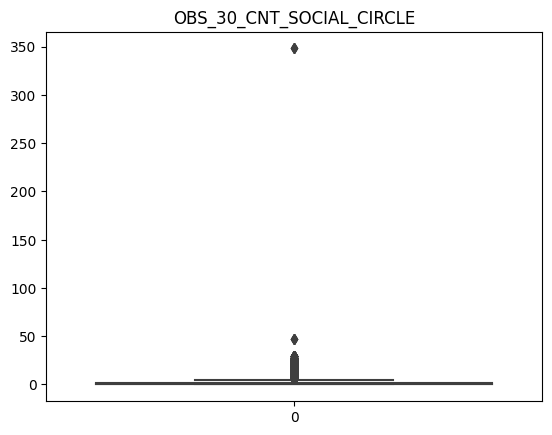

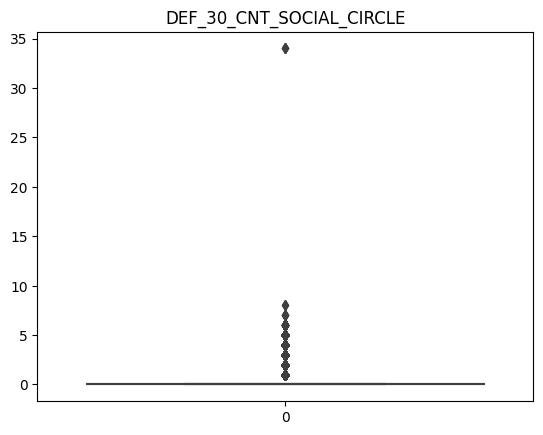

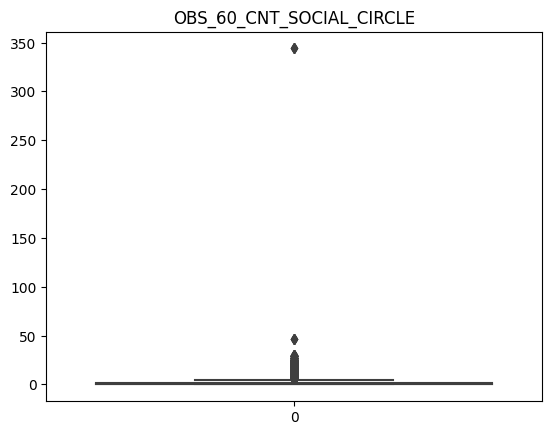

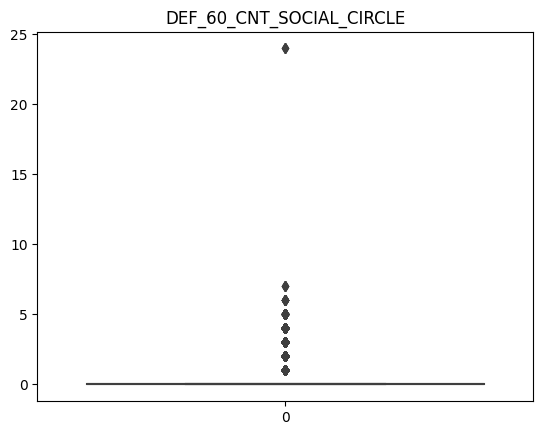

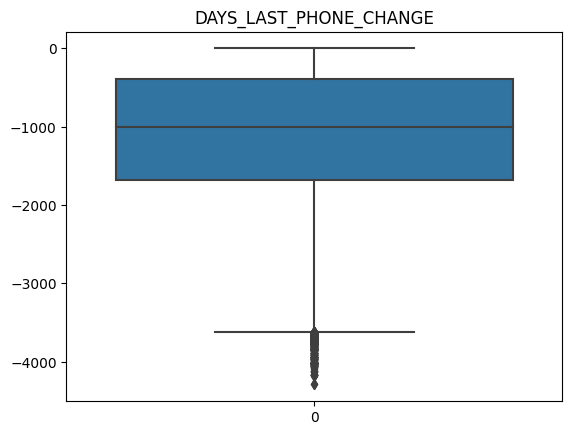

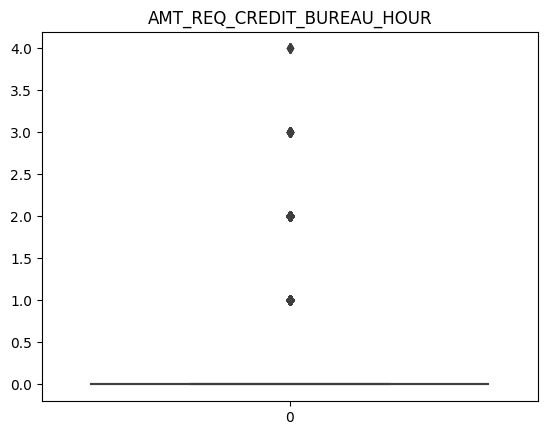

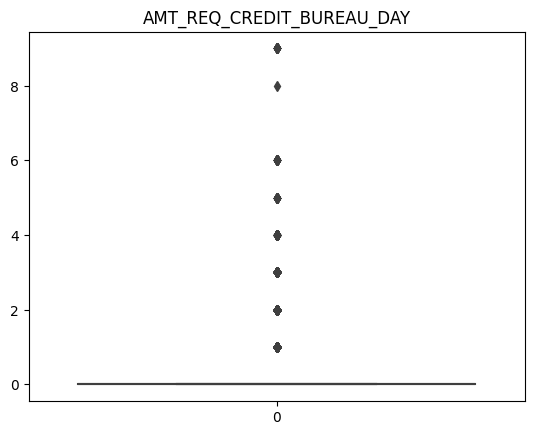

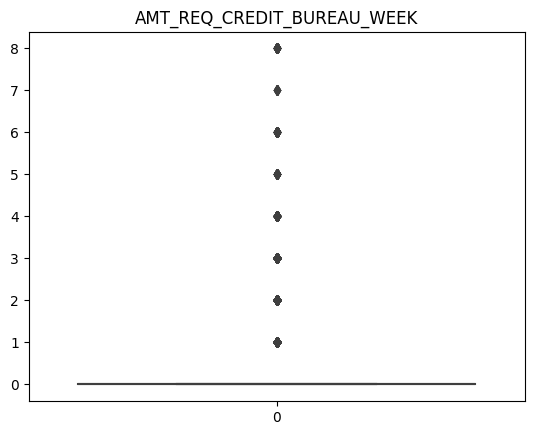

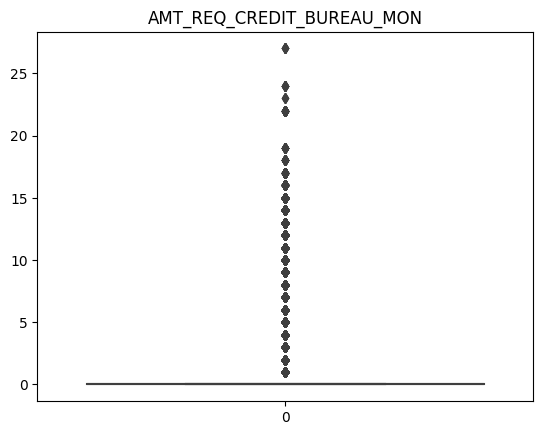

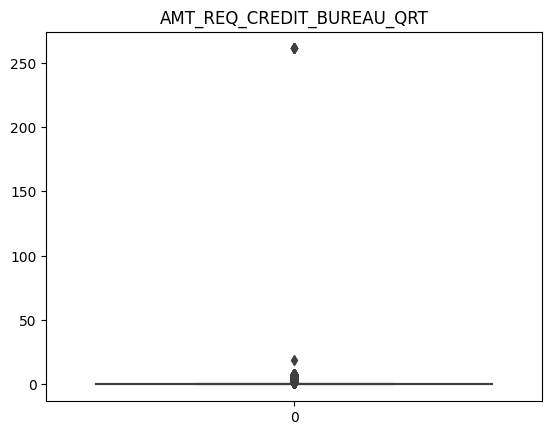

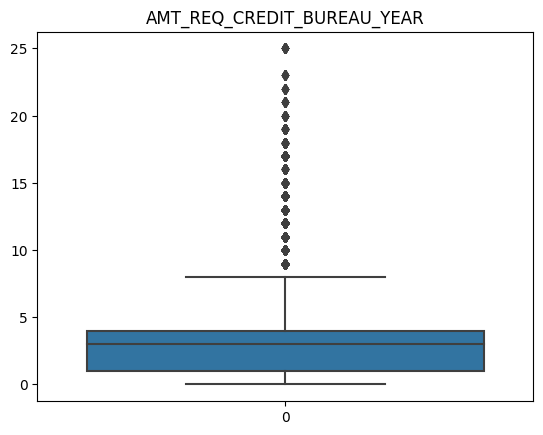

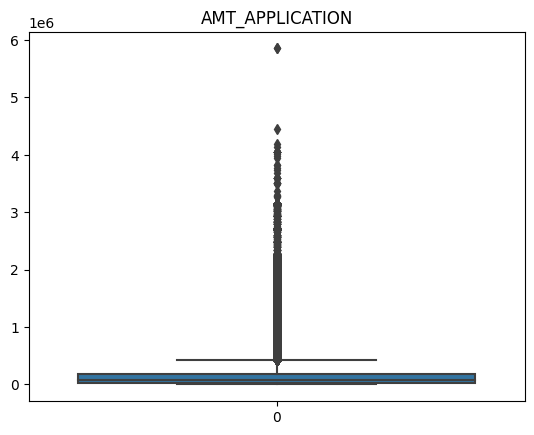

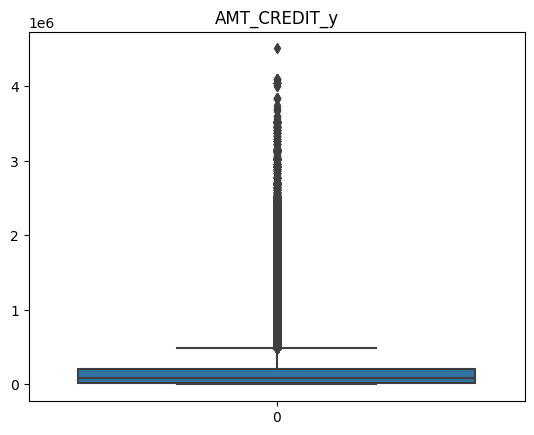

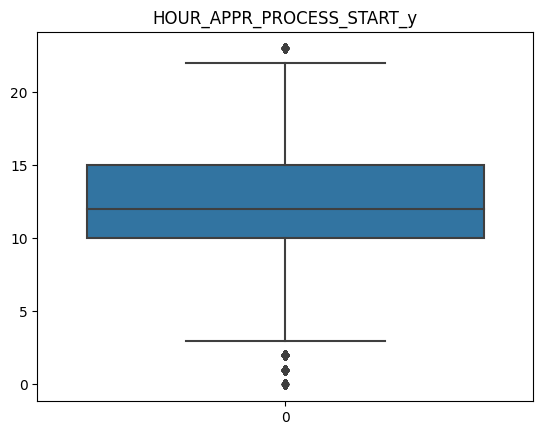

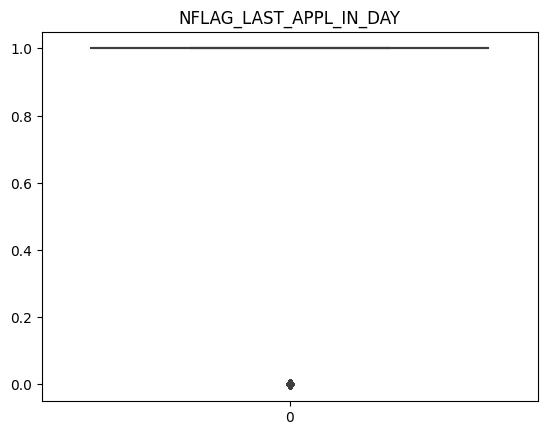

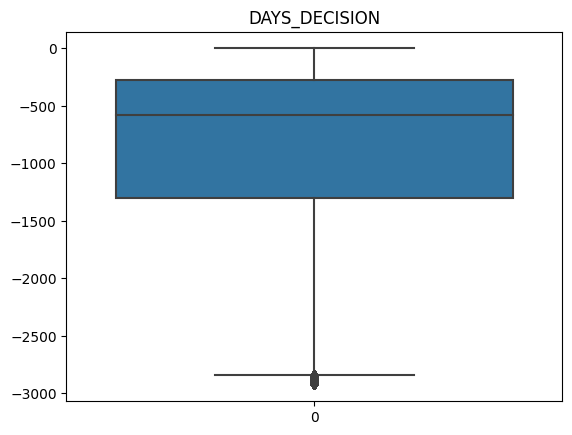

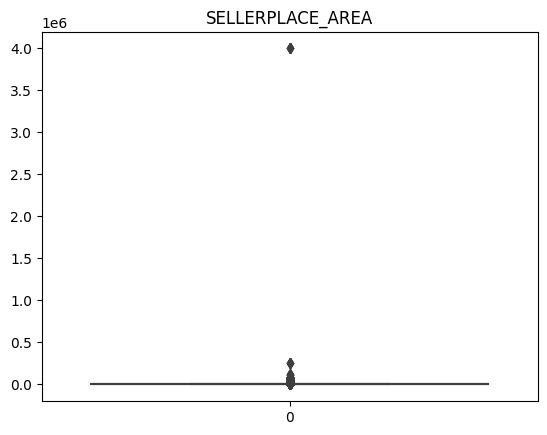

In [21]:
for col in numeric:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

There seem to be outliers in most of the columns, however for the sake of this analysis they will not be imputed.

#### Data Imbalance

<Axes: >

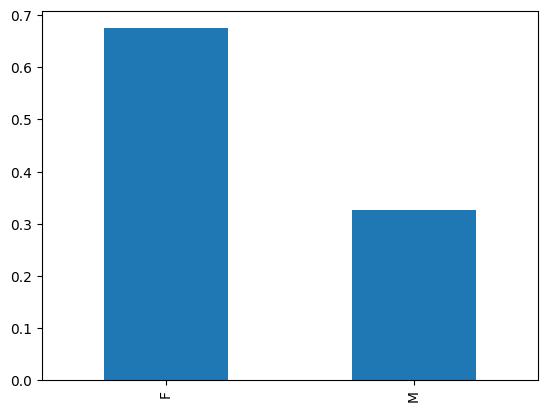

In [22]:
#Gender
df['CODE_GENDER'].value_counts(normalize = True).plot.bar()

The dataset has more number of females who have applied for loan compared to males

<Axes: >

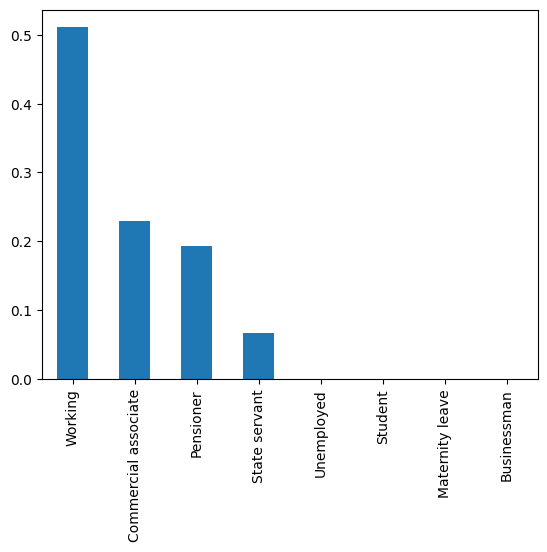

In [23]:
#Income Type
df['NAME_INCOME_TYPE'].value_counts(normalize = True).plot.bar()

The dataset has a lot of working class people

<Axes: >

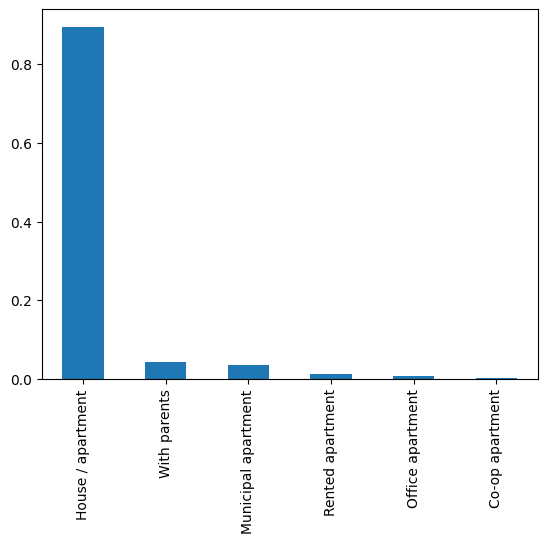

In [24]:
#Housing situation
df['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.bar()

The dataset has a lot of people who live in a house or apartment

Hence it is sufficient to conclude that the data is imbalanced

#### UNIVARIATE ANALYSIS

<Axes: ylabel='count'>

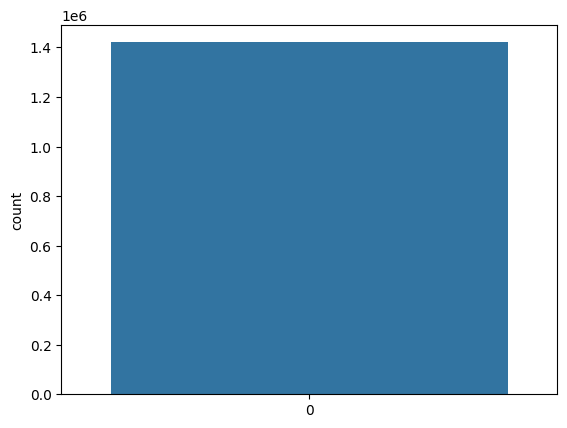

In [25]:
sns.countplot(df['TARGET'])

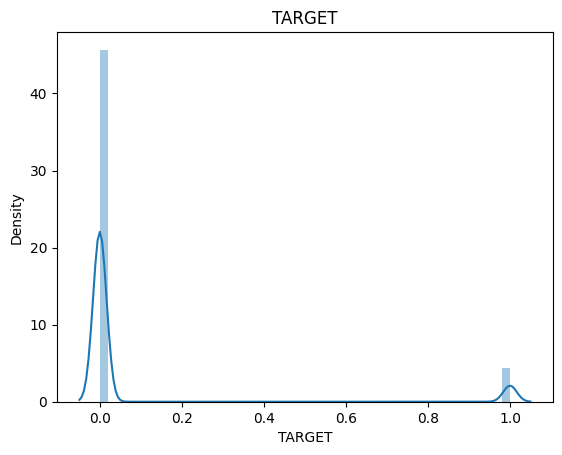

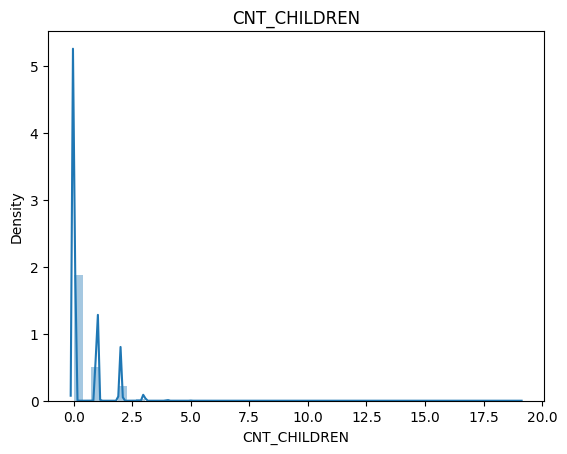

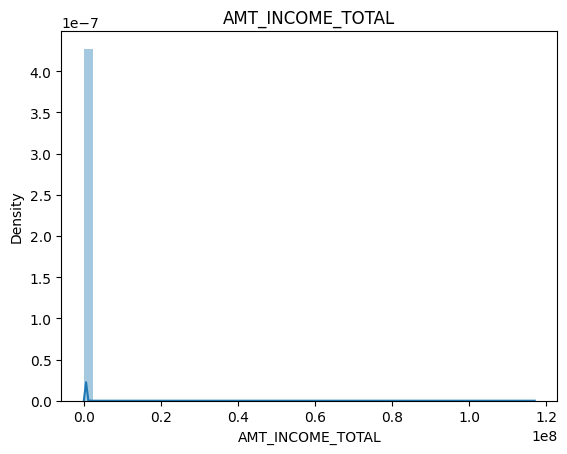

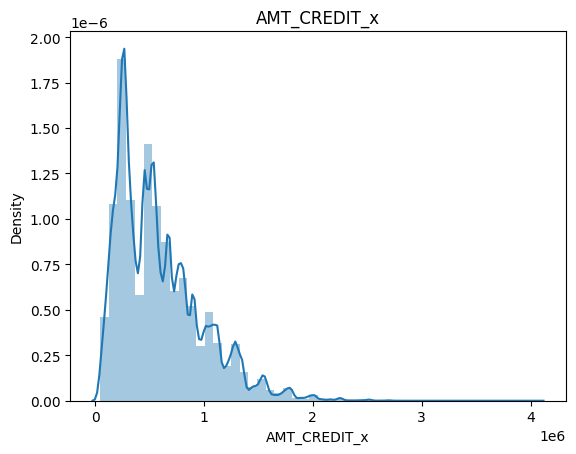

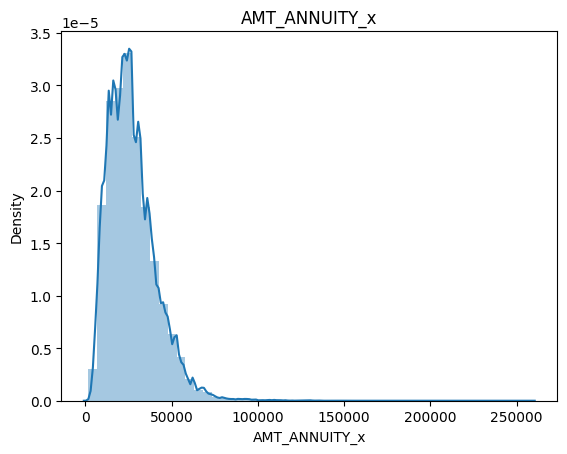

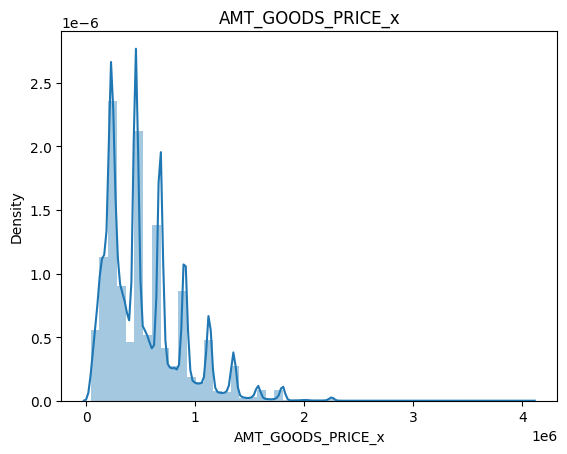

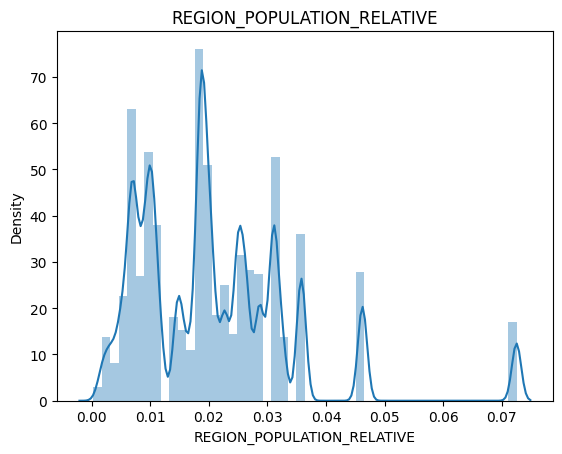

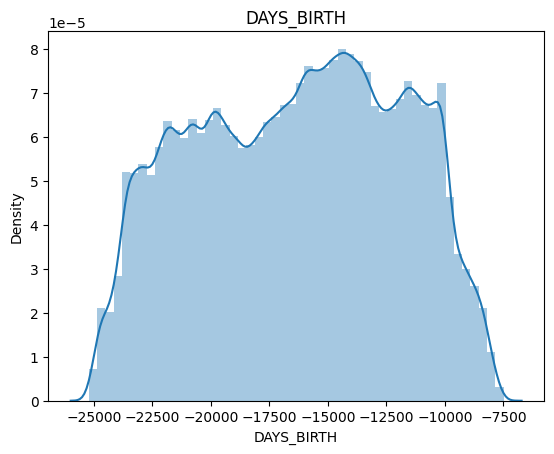

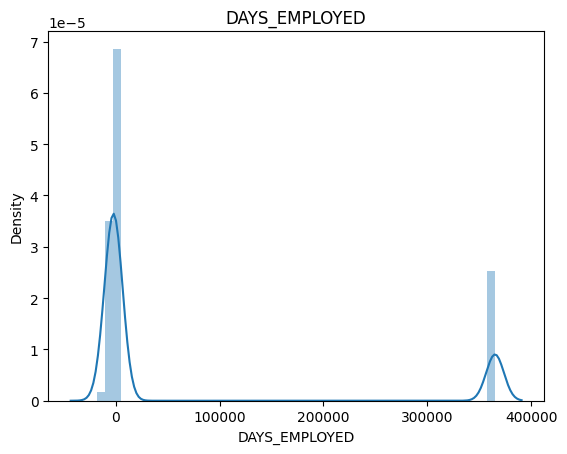

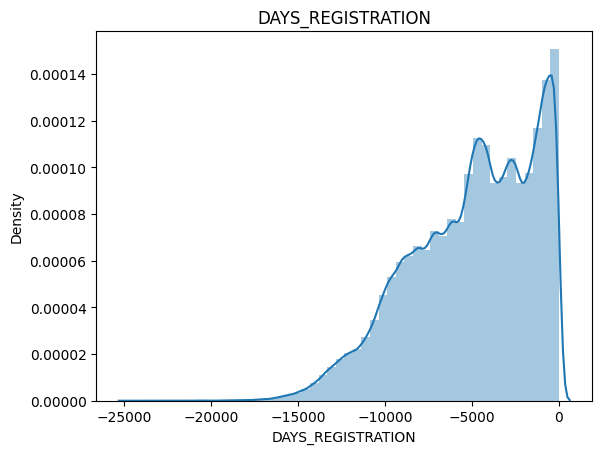

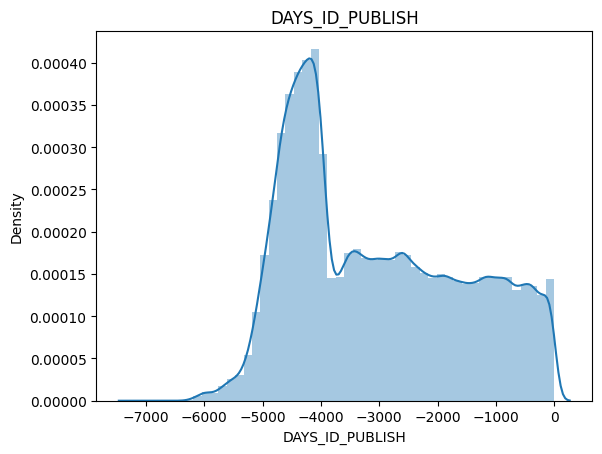

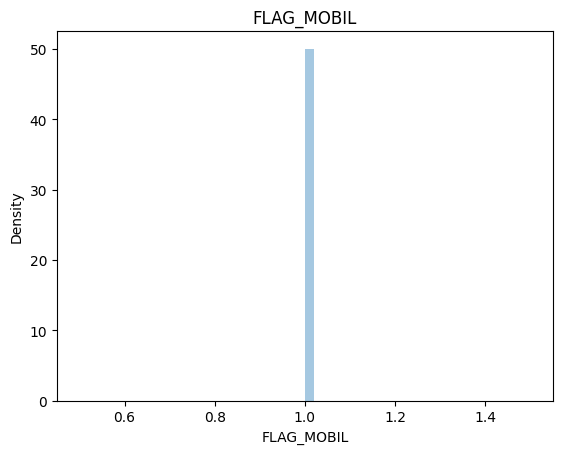

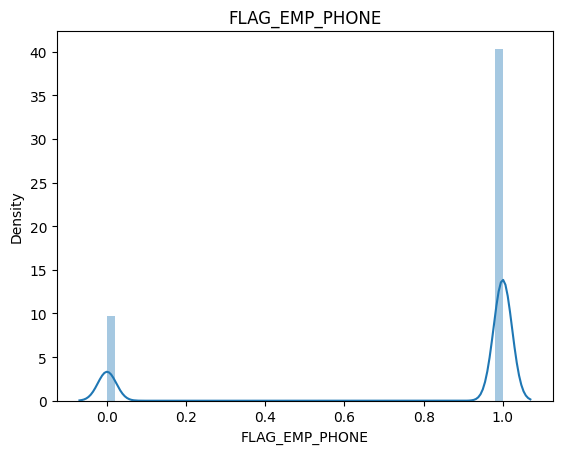

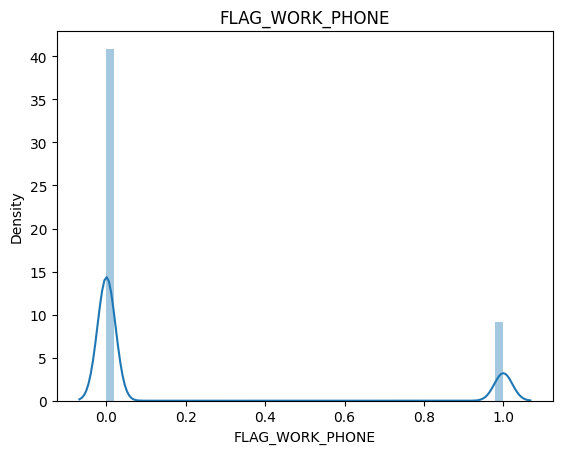

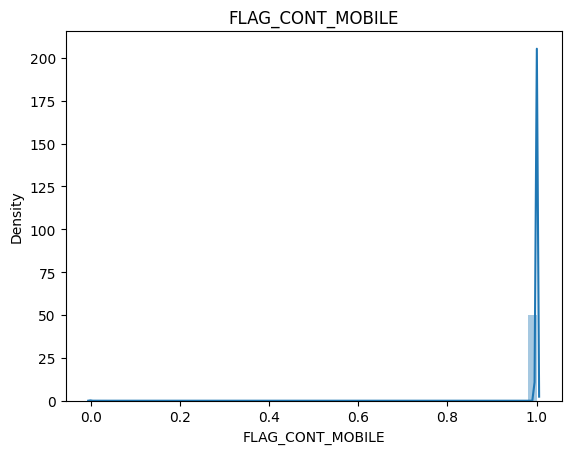

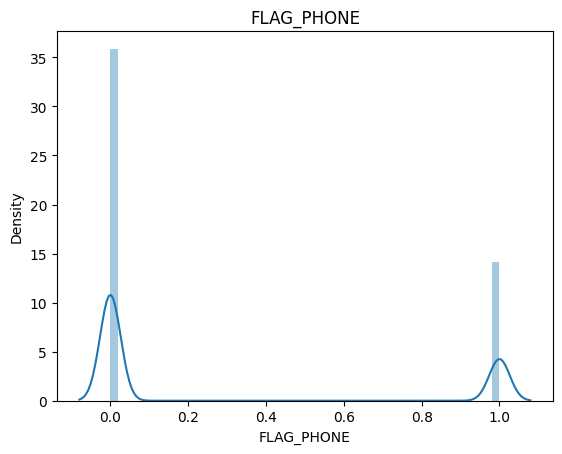

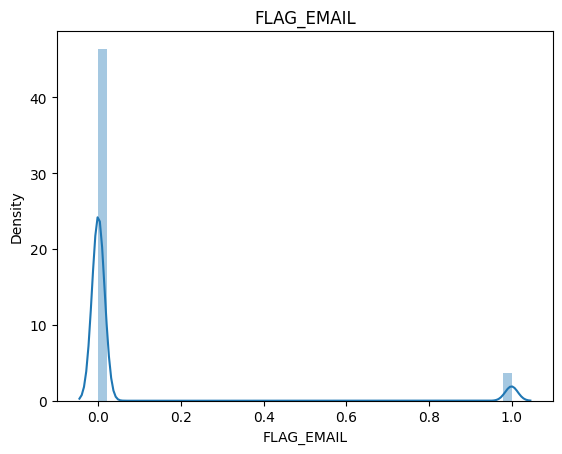

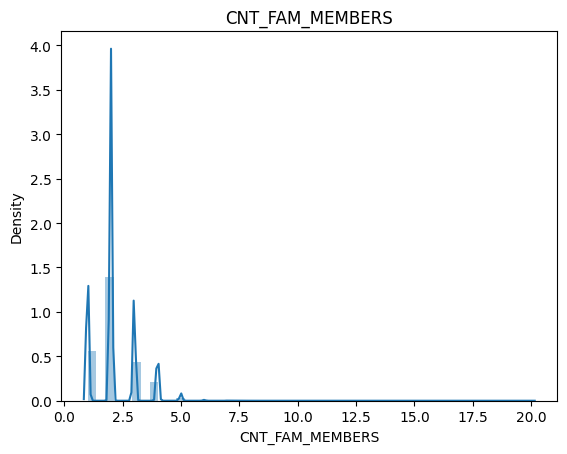

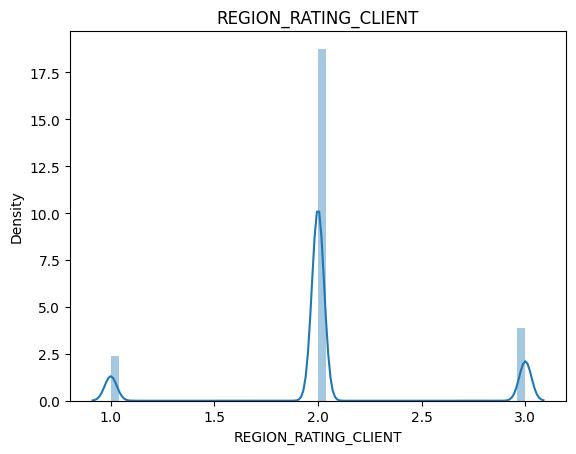

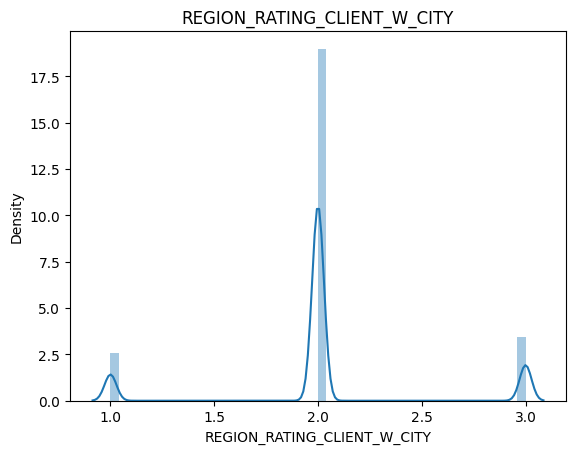

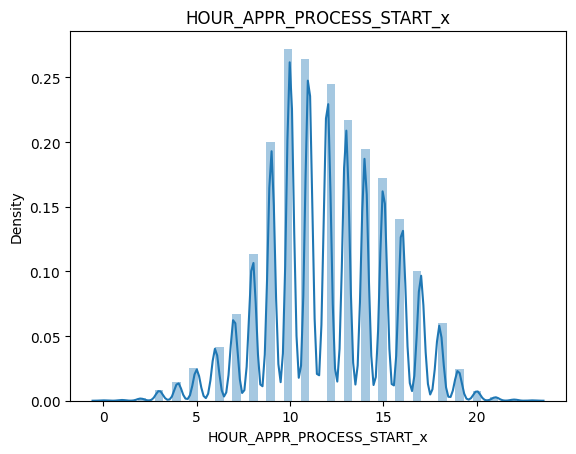

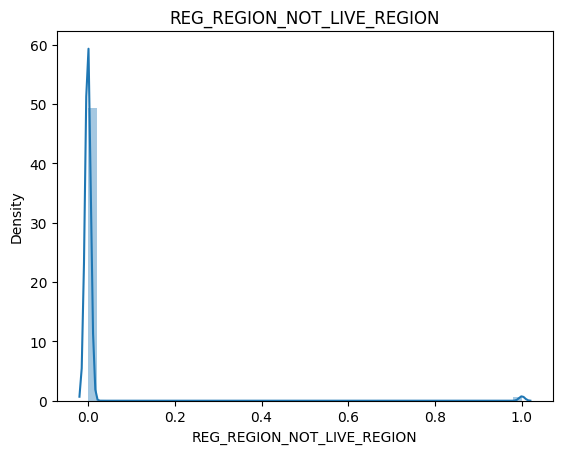

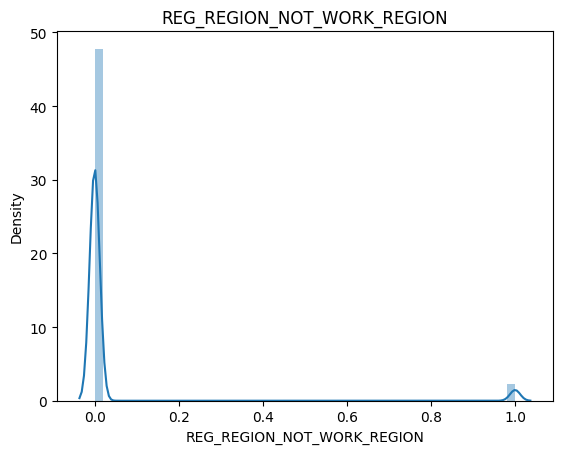

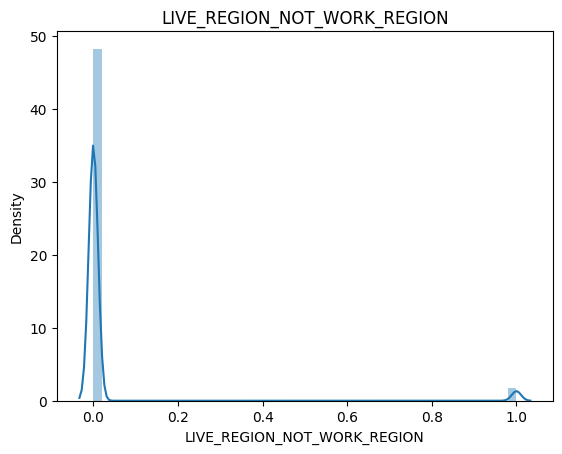

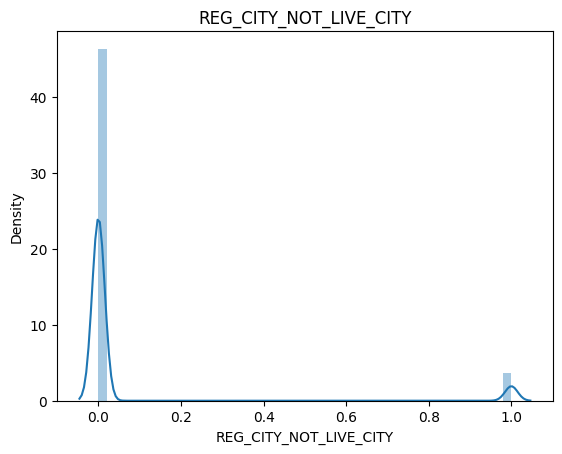

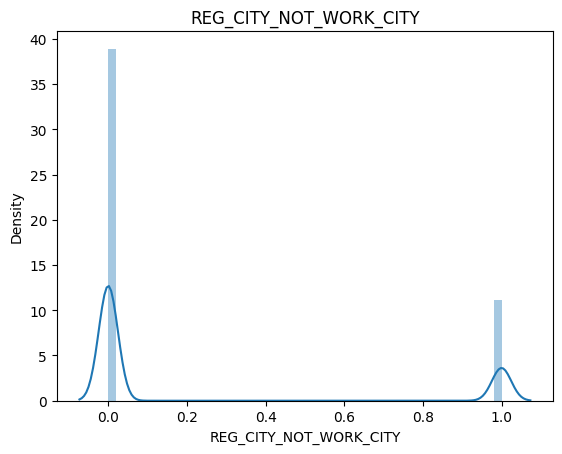

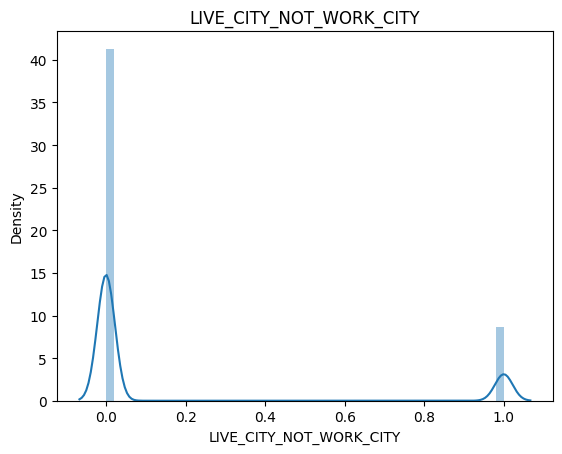

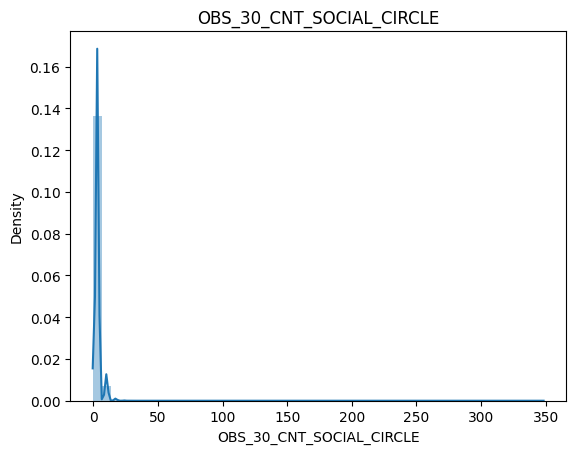

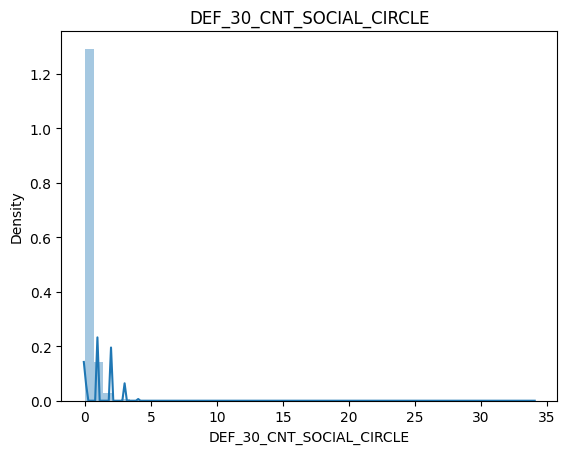

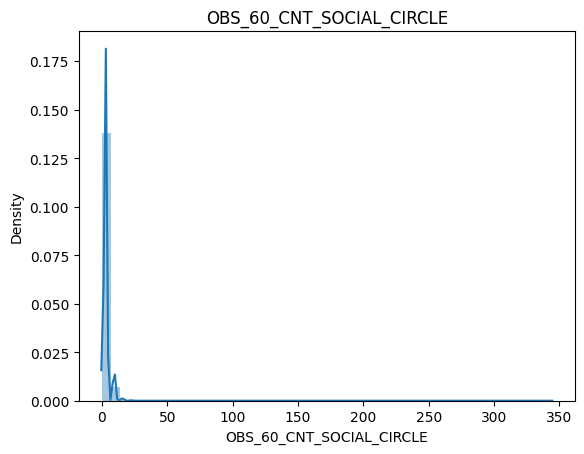

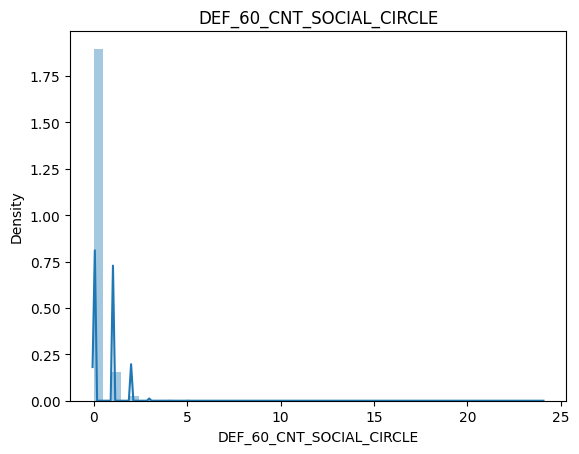

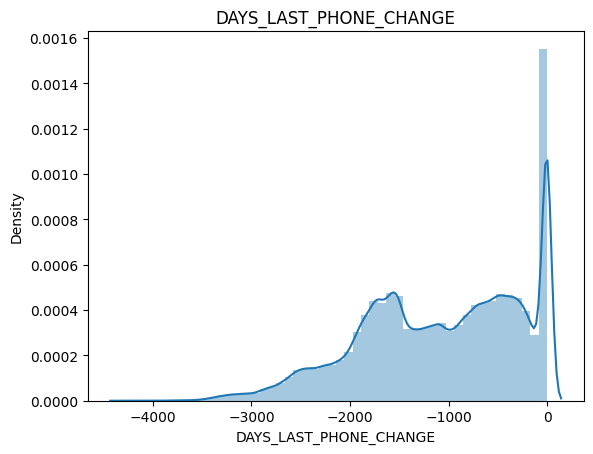

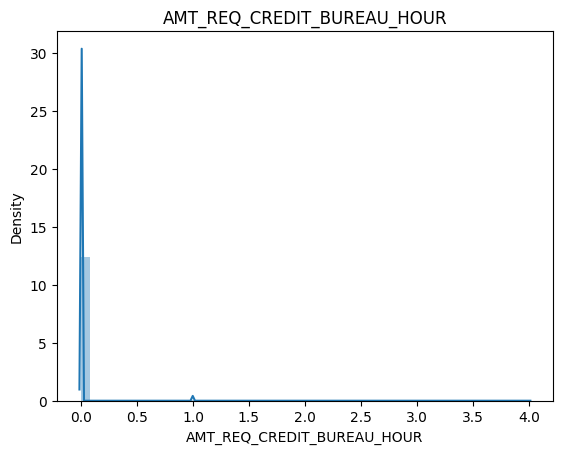

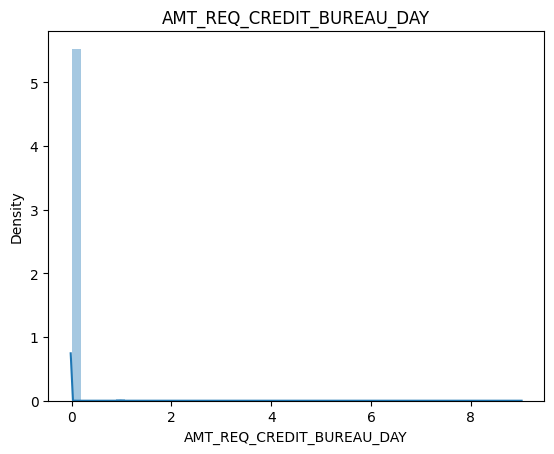

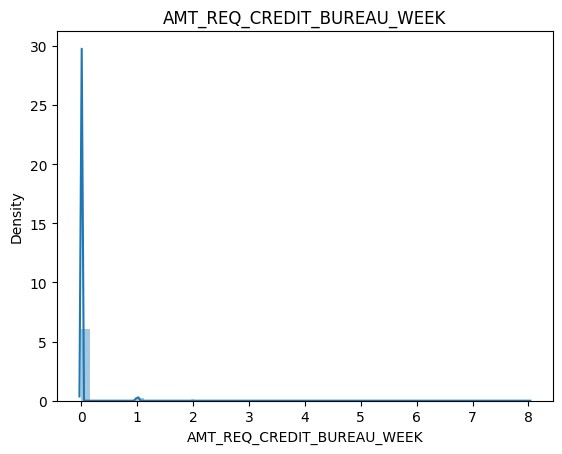

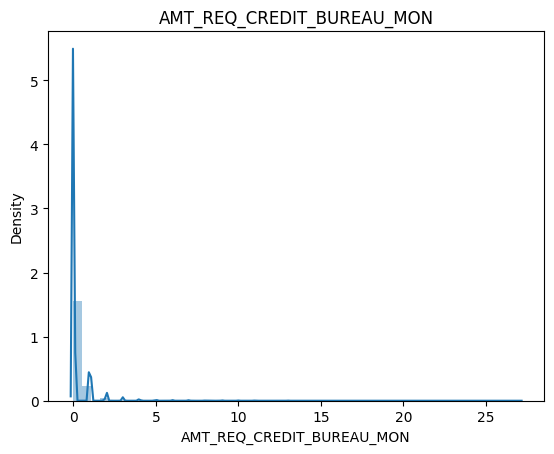

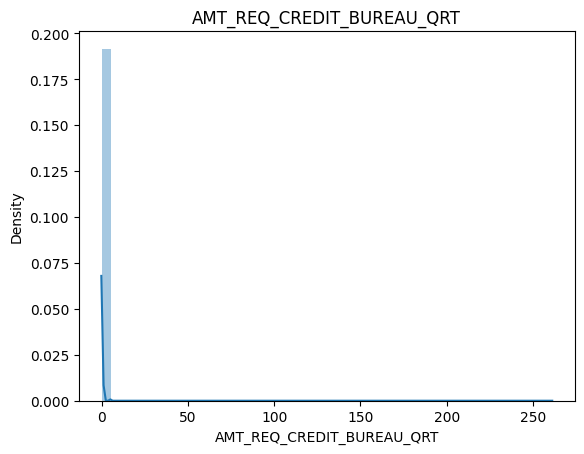

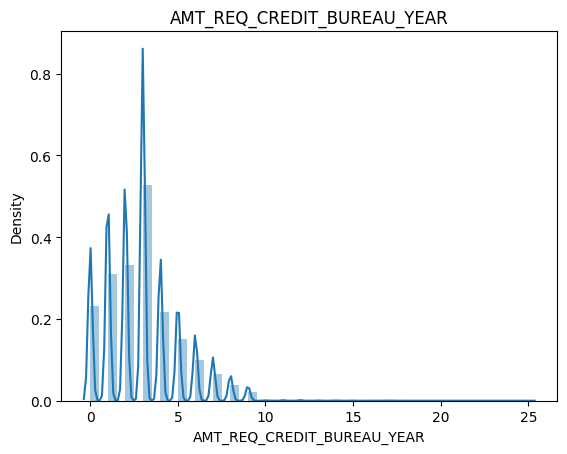

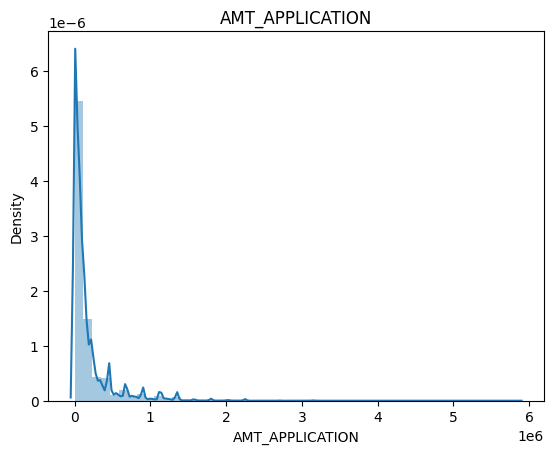

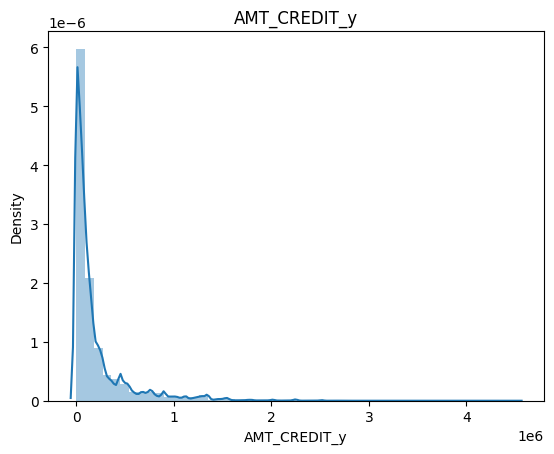

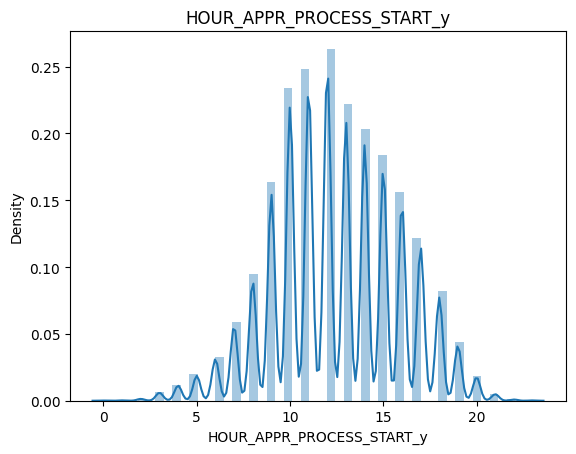

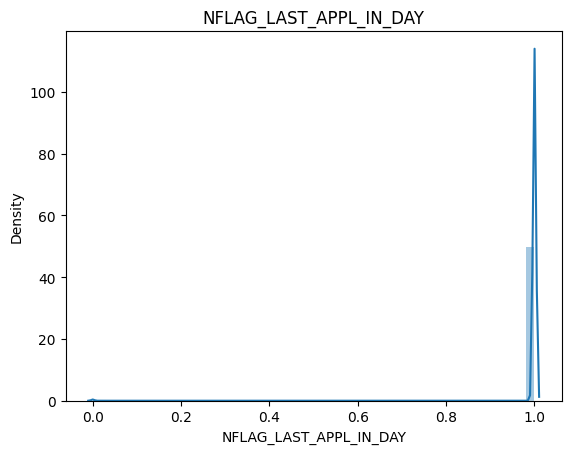

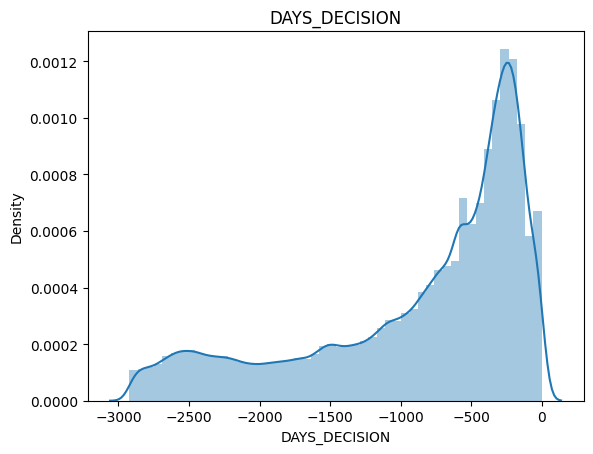

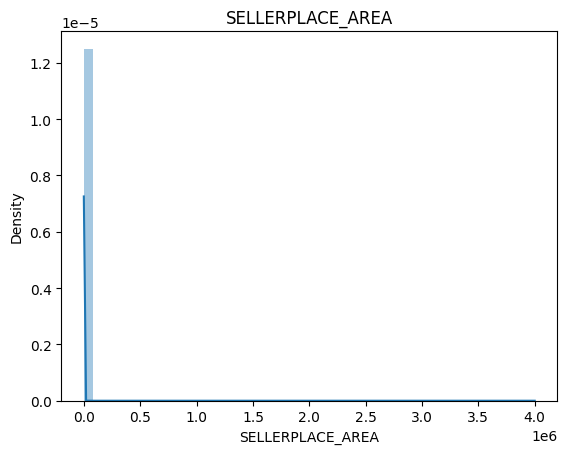

In [26]:
#Numeric variables
for col in numeric:
  sns.distplot(df[col])
  plt.title(col)
  plt.show()

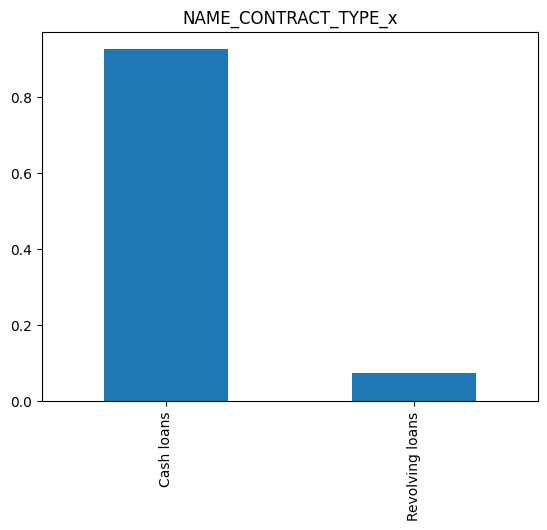

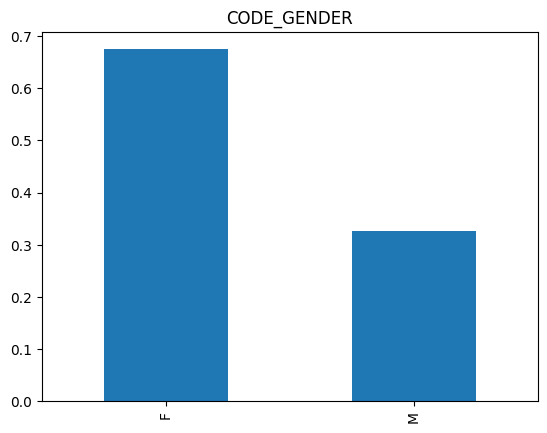

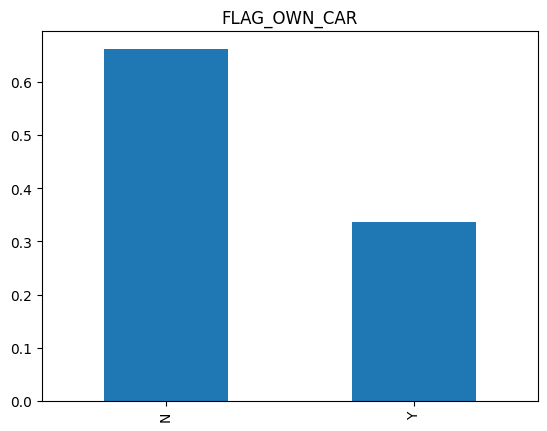

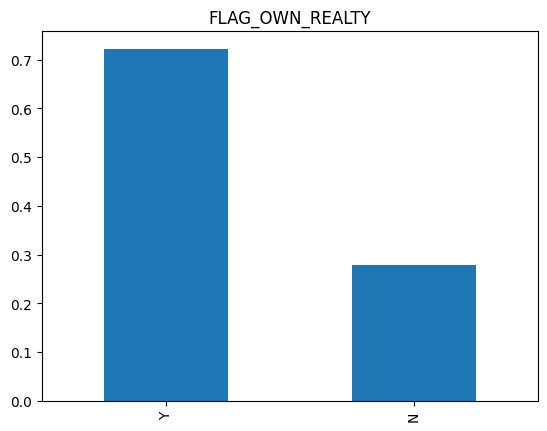

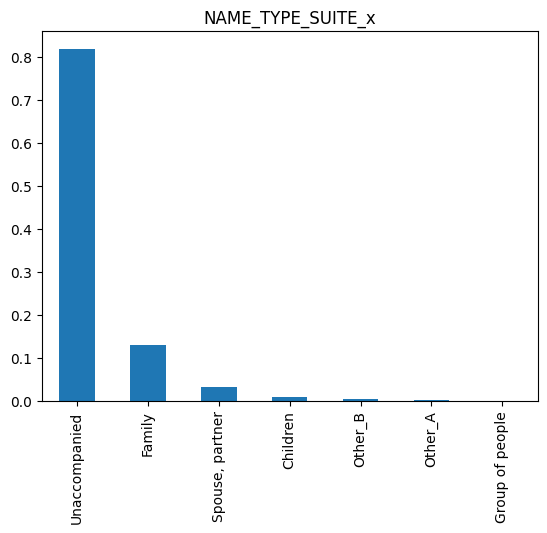

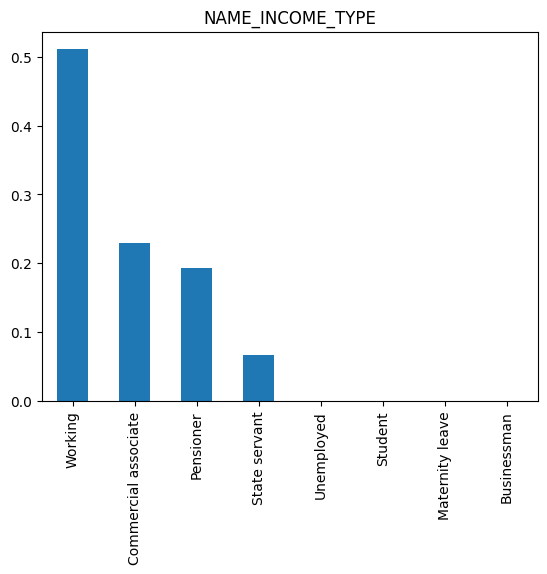

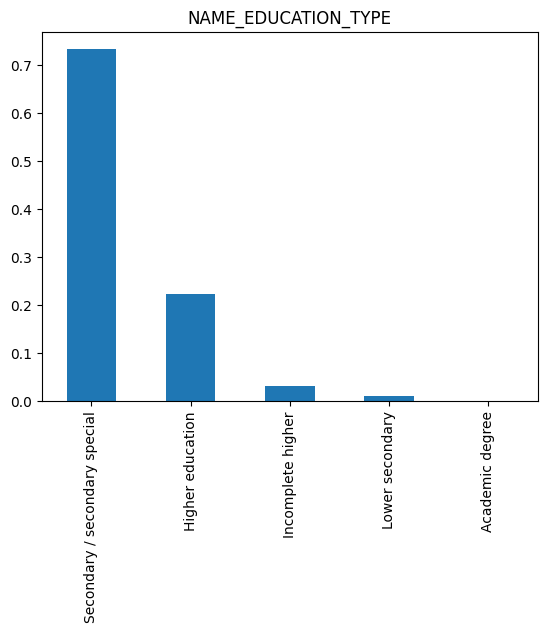

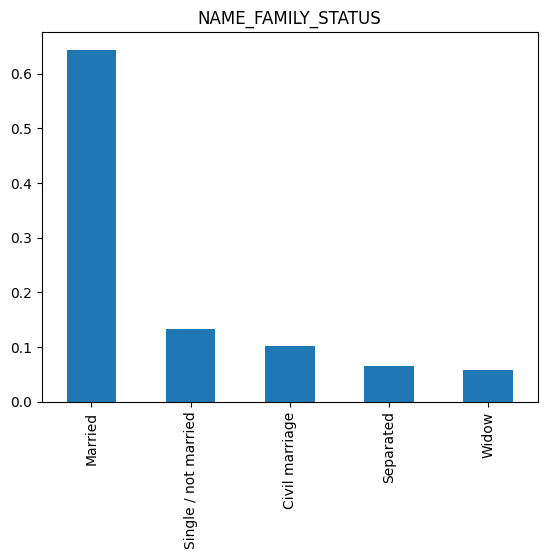

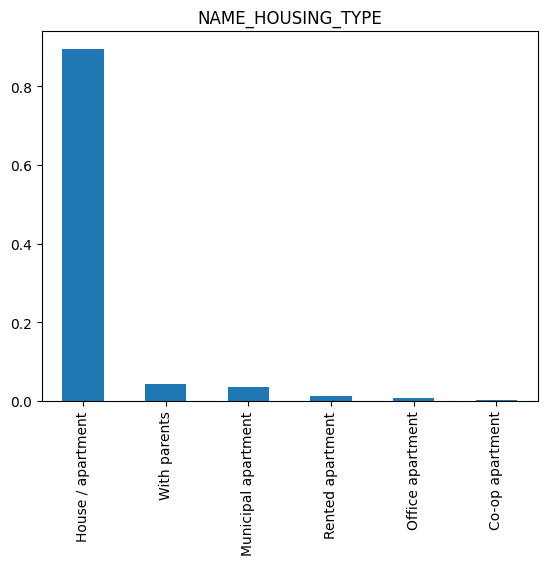

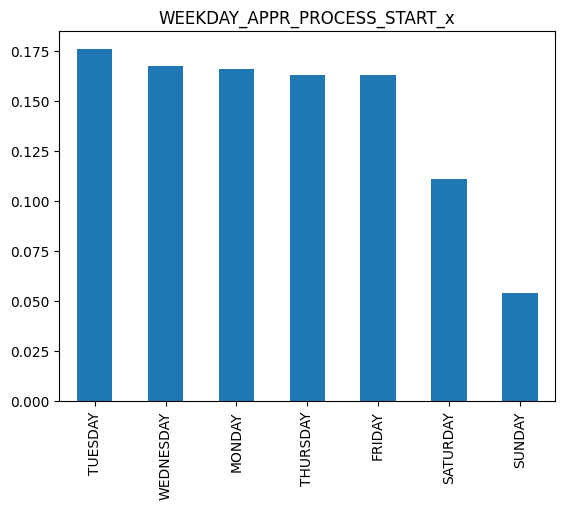

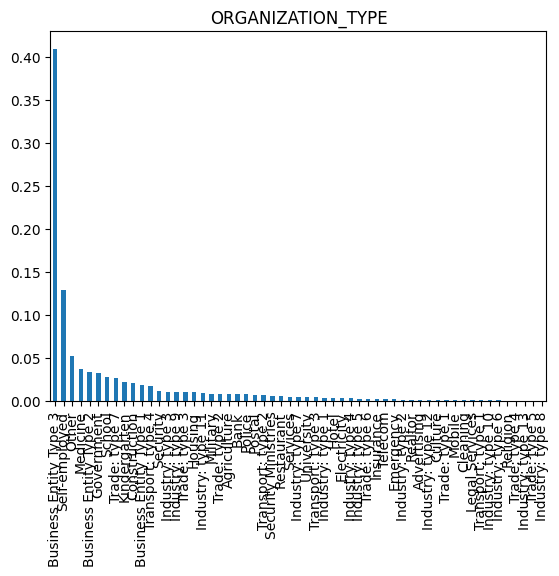

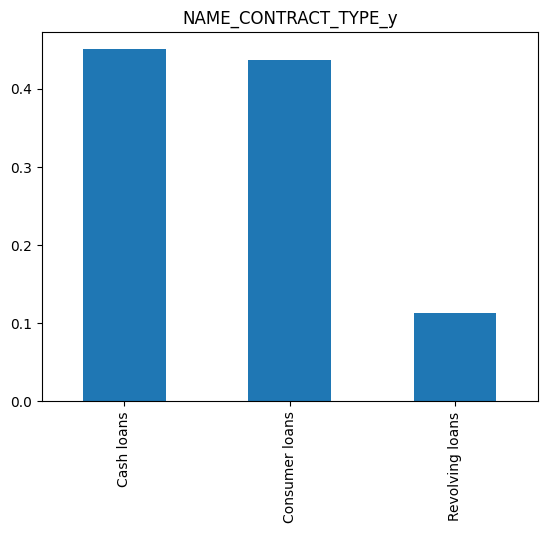

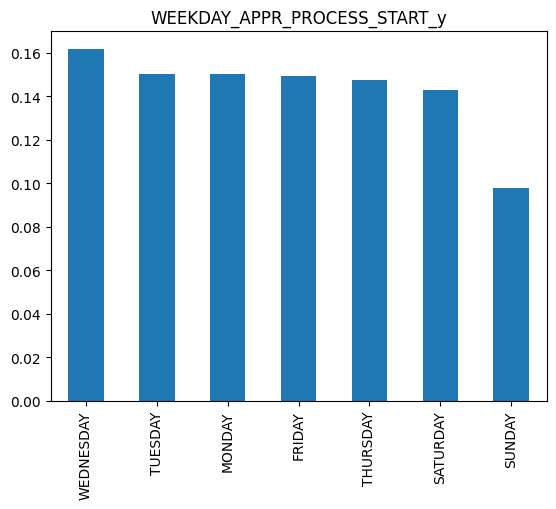

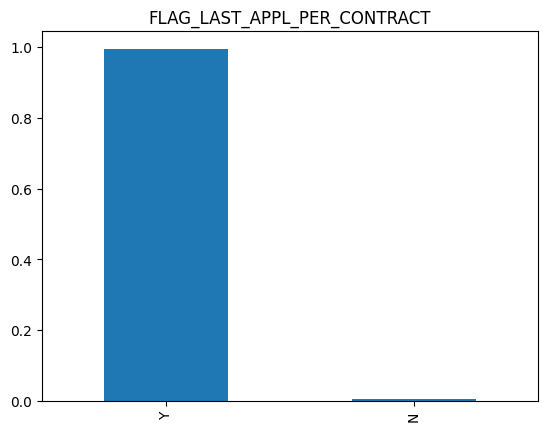

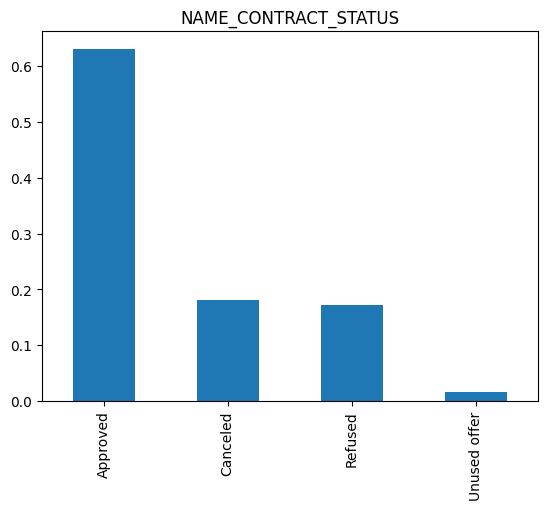

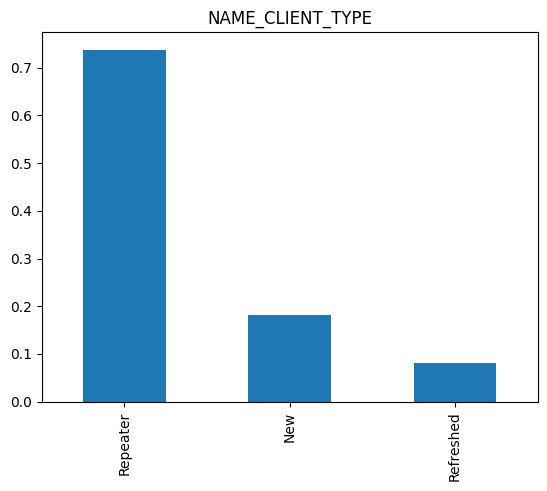

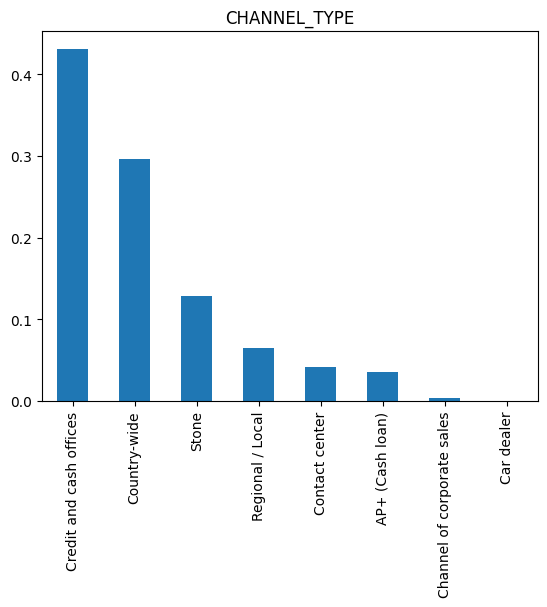

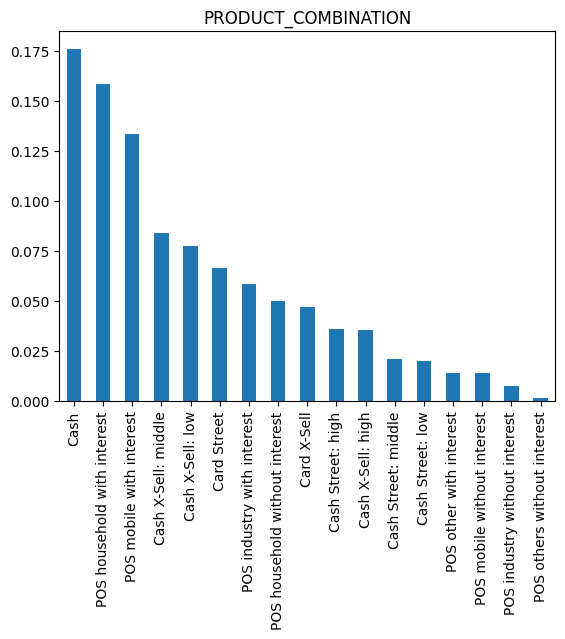

In [27]:
#Categorical variables
for col in categorical:
  df[col].value_counts(normalize = True).plot.bar()
  plt.title(col)
  plt.show()

#### BIVARIATE ANALYSIS

Text(0.5, 0, 'TARGET')

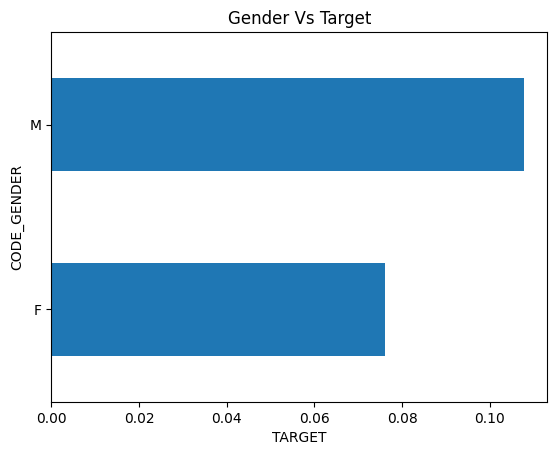

In [28]:
#Target vs Gender
df.groupby('CODE_GENDER')['TARGET'].mean().plot.barh()
plt.title('Gender Vs Target')
plt.xlabel('TARGET')

Males seem to have higher chances of default than females

In [29]:
#Categorize income column
#Very low income - less than 50k
#low income - less than 1L
#Medium income - less than 10L
#High income - less than 50L
#Very high income - greater than 50L
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: x/100000)
def categorize_income(income):
    if income < 0.5:
        return "Very Low Income"
    elif 0.5 <= income < 1:
        return "Low Income"
    elif 1 <= income < 10:
        return "Medium Income"
    elif 10 <= income < 50:
        return "High Income"
    else:
        return "Very High Income"

df['INCOME_CATEGORY'] = df['AMT_INCOME_TOTAL'].apply(categorize_income)

Text(0, 0.5, 'TARGET')

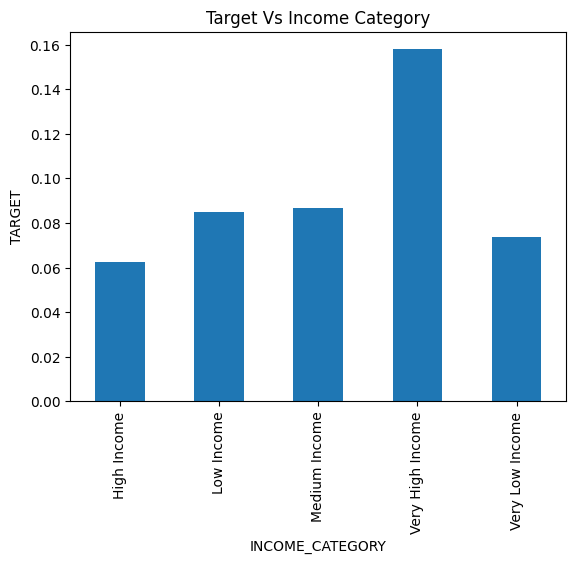

In [30]:
#Target Vs Income Category
df.groupby('INCOME_CATEGORY')['TARGET'].mean().plot.bar()
plt.title('Target Vs Income Category')
plt.ylabel('TARGET')

People in the very high income category have higher chances of defaulting

Text(0, 0.5, 'TARGET')

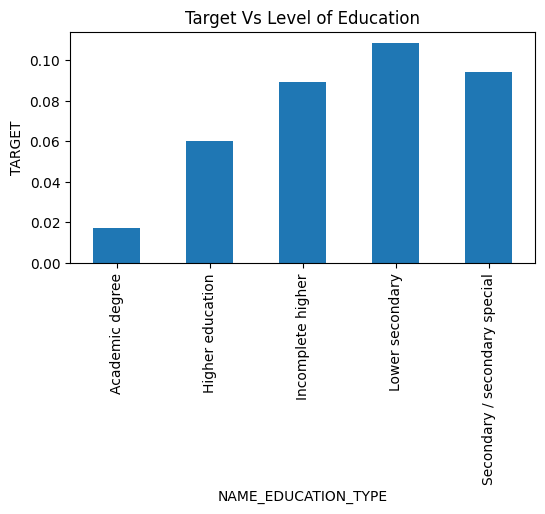

In [48]:
#Target Vs Level of Education
plt.figure(figsize = (6, 3))
df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.title('Target Vs Level of Education')
plt.ylabel('TARGET')

People who have only completed a lower secondary degree tend to default more. This makes sense as such people may not have a good income to pay their bills on time.

Text(0.5, 0, 'Job')

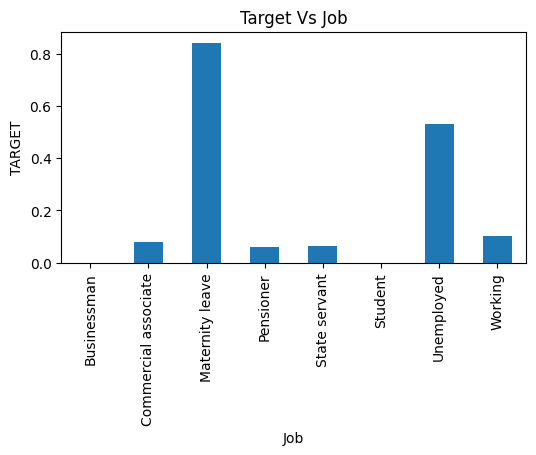

In [49]:
#Target Vs Job
plt.figure(figsize = (6, 3))
df.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.bar()
plt.title('Target Vs Job')
plt.ylabel('TARGET')
plt.xlabel('Job')

People who are on maternity leave and who are unemployed tend to default at a higher rate

Text(0, 0.5, 'TARGET')

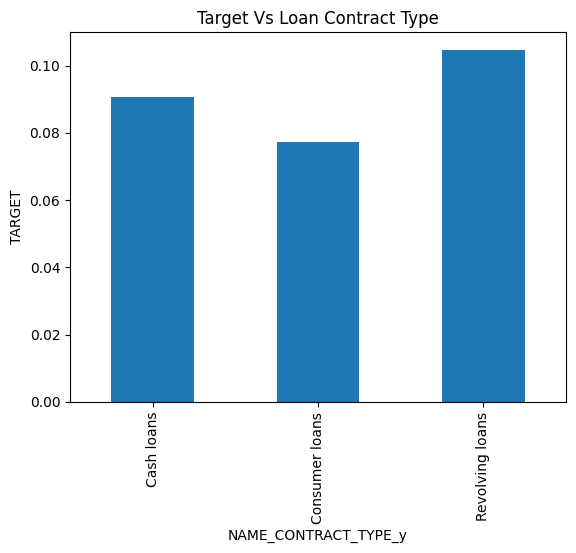

In [33]:
#Target Vs Contract type
df.groupby('NAME_CONTRACT_TYPE_y')['TARGET'].mean().plot.bar()
plt.title('Target Vs Loan Contract Type')
plt.ylabel('TARGET')

[]

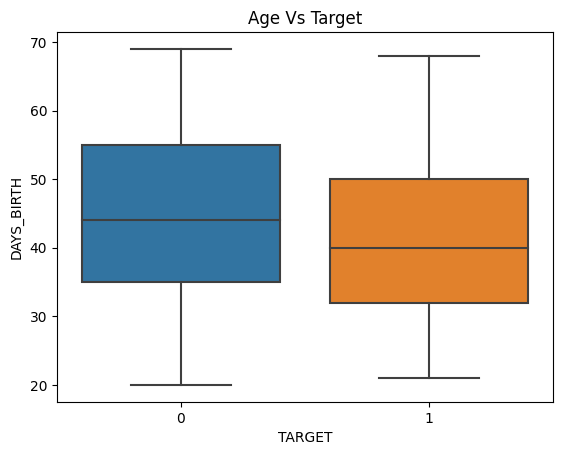

In [34]:
#Target Vs Age
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x//365)
sns.boxplot(df, x = df['TARGET'], y = df['DAYS_BIRTH'])
plt.title('Age Vs Target')
plt.plot()

Text(0, 0.5, 'TARGET')

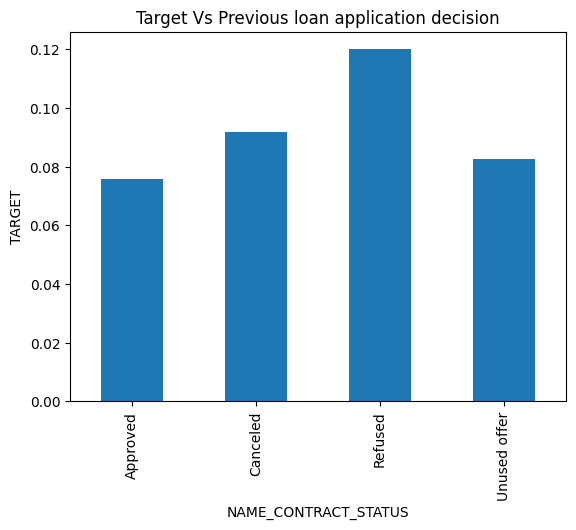

In [35]:
#Target Vs Previous loan application decision
df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.bar()
plt.title('Target Vs Previous loan application decision')
plt.ylabel('TARGET')

People who's previous application was rejected have a higher chance to default

Text(0.5, 1.0, 'Number of members in the family Vs Target')

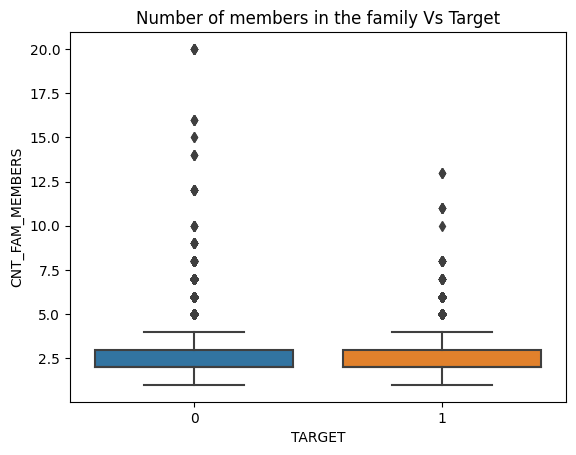

In [36]:
#Target Vs number of members in the family
sns.boxplot(df, x = df['TARGET'], y = df['CNT_FAM_MEMBERS'])
plt.title('Number of members in the family Vs Target')

Number of family members does'nt seem to have any effect on default rate

#### MULTIVARIATE ANALYSIS

Text(45.722222222222214, 0.5, 'Gender')

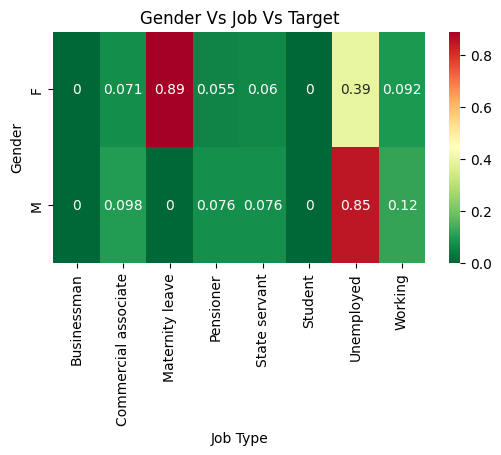

In [50]:
#Work Type VS Gender Vs Target
plt.figure(figsize = (6, 3))
sns.heatmap(pd.pivot_table(data = df, index = 'CODE_GENDER', columns = 'NAME_INCOME_TYPE', values = 'TARGET'),
            annot = True, cmap = 'RdYlGn_r')
plt.title('Gender Vs Job Vs Target')
plt.xlabel('Job Type')
plt.ylabel('Gender')

Text(45.722222222222214, 0.5, 'Gender')

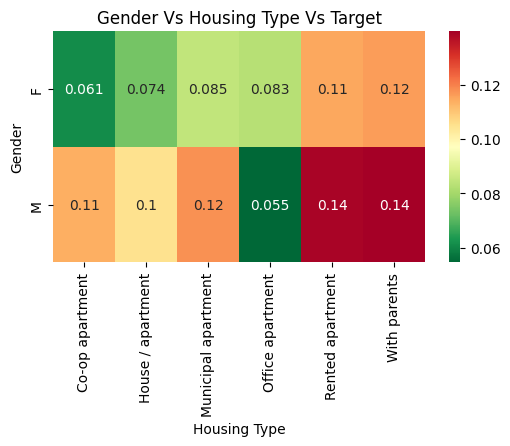

In [51]:
#Housing Type VS Gender Vs Target
plt.figure(figsize = (6, 3))
sns.heatmap(pd.pivot_table(data = df, index = 'CODE_GENDER', columns = 'NAME_HOUSING_TYPE', values = 'TARGET'),
            annot = True, cmap = 'RdYlGn_r')
plt.title('Gender Vs Housing Type Vs Target')
plt.xlabel('Housing Type')
plt.ylabel('Gender')

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='NAME_INCOME_TYPE'>

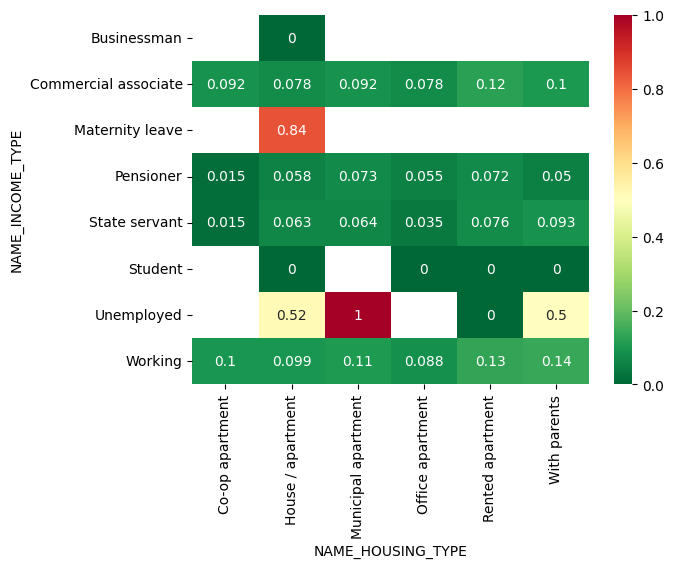

In [39]:
 #Housing type Vs Income Type Vs Target
 sns.heatmap(pd.pivot_table(data = df, index = 'NAME_INCOME_TYPE', columns = 'NAME_HOUSING_TYPE', values = 'TARGET'),
            annot = True, cmap = 'RdYlGn_r')

#### Top 20 correlated features

In [40]:
#Check the top 10 features with highest correlation with the target variable
corr_mat = df.corr()
print(corr_mat[['TARGET']].to_string())

                               TARGET
TARGET                       1.000000
CNT_CHILDREN                 0.020423
AMT_INCOME_TOTAL            -0.002479
AMT_CREDIT_x                -0.024418
AMT_ANNUITY_x               -0.008263
AMT_GOODS_PRICE_x           -0.033262
REGION_POPULATION_RELATIVE  -0.035151
DAYS_BIRTH                  -0.074635
DAYS_EMPLOYED               -0.047587
DAYS_REGISTRATION            0.042835
DAYS_ID_PUBLISH              0.050626
FLAG_MOBIL                        NaN
FLAG_EMP_PHONE               0.048535
FLAG_WORK_PHONE              0.028049
FLAG_CONT_MOBILE             0.000140
FLAG_PHONE                  -0.021473
FLAG_EMAIL                   0.002374
CNT_FAM_MEMBERS              0.014735
REGION_RATING_CLIENT         0.057154
REGION_RATING_CLIENT_W_CITY  0.059868
HOUR_APPR_PROCESS_START_x   -0.022321
REG_REGION_NOT_LIVE_REGION   0.003034
REG_REGION_NOT_WORK_REGION   0.006408
LIVE_REGION_NOT_WORK_REGION  0.003714
REG_CITY_NOT_LIVE_CITY       0.041085
REG_CITY_NOT

In [41]:
#Drop FLAG_MOBIL since it gives nan correlation
df.drop('FLAG_MOBIL', axis = 1, inplace = True)
corr_mat = df.corr()

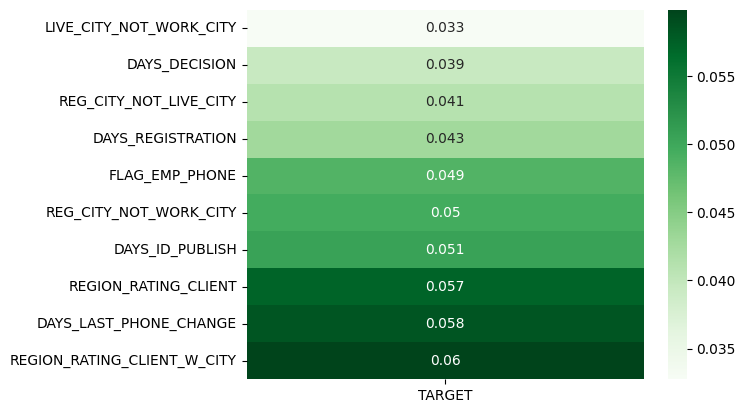

In [42]:
# ten most positively co-related features
pos_corr = corr_mat[['TARGET']].sort_values(by = ['TARGET']).iloc[-11:-1, :]
sns.heatmap(pos_corr, cmap = 'Greens', annot = True)
plt.show()

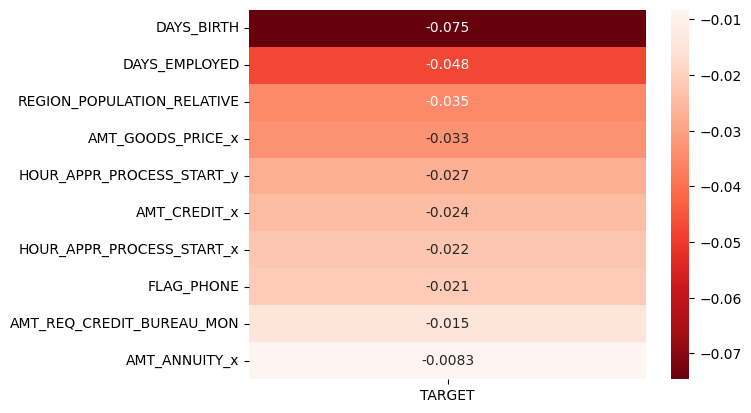

In [43]:
#ten most negatively co-related features
neg_corr = corr_mat[['TARGET']].sort_values(by = ['TARGET']).iloc[:10, :]
sns.heatmap(neg_corr, cmap = 'Reds_r', annot = True)
plt.show()

RESULTS:
- From the analysis it is evident that banks should never grant loans to unemployed people especially if they live in a municipal apartment
- The bank must also not grant loans to women on maternity leave as they have a very high chance to default
- Also male applications must be scrutinized more as they are more likely to default
- It is essential to look at the applicant’s level of education as lower the level of education higher is the chance to default
